In [18]:
import numpy as np
import pandas as pd
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import math
import random
import copy

$\text{Q1:Describe travelling salesman problem}$

$\text{Answer:The Traveling Salesman Problem (TSP) is a famous problem in computer science and mathematics that asks the following question:} \\ \text{ given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and } \\ \text{ returns to the starting city? This is an optimization problem that has been shown to be NP-hard, meaning that there is no known algorithm } \\ \text{ that can solve all instances of the problem efficiently.}$

In [9]:
data_11=pd.read_csv('TSP11.csv',header=None)
data_11.head()

0   1   2   3   4   5    6   7   8   9   10
0   0  29  20  21  16  31  100  12   4  31  18
1  29   0  15  29  28  40   72  21  29  41  12
2  20  15   0  15  14  25   81   9  23  27  13
3  21  29  15   0   4  12   92  12  25  13  25
4  16  28  14   4   0  16   94   9  20  16  22

In [8]:
data_48=pd.read_csv('TSP48.csv',header=None)
data_48.head()

0     1     2     3     4     5     6     7     8     9   ...    38  \
0     0  4727  1205  6363  3657  3130  2414   563   463  5654  ...  3530   
1  4727     0  3588  2012  1842  6977  6501  5187  5028  2327  ...  3085   
2  1205  3588     0  5163  2458  3678  3071  1742  1444  4462  ...  2482   
3  6363  2012  5163     0  2799  8064  7727  6878  6581  1402  ...  3669   
4  3657  1842  2458  2799     0  5330  4946  4200  3824  2012  ...  1252   

     39    40    41    42    43    44    45    46    47  
0   825  2188  4820  3489  1947  6835  1542  2379  3744  
1  4564  2756  1591  7027  6186  3472  5461  4390  2088  
2  1027  1395  3617  3891  2686  5661  2023  1867  2560  
3  6011  4638  1681  7987  7502  1877  6758  5360  2844  
4  3227  2426  1169  5313  4706  3241  3962  2651   304  

[5 rows x 48 columns]

$\text{(R)Given a tour of the salesman compute the cost, which is total distance travelled in that tour. Create cost()
function which takes a sequence} \\ \text{ of cities as input and calculates the total distance travelled. For example in
a 4 city scenario, given the sequence of cities as [B,C,D,A],} \\ \text{ your function should calculate the total distance
travelled in that particular order.}$

In [15]:
# cost function
def compute_cost(tour):
  cost=0
  for i in range(len(tour)):
    cost=cost+data_11.iloc[tour[i],tour[i+1]]
    if i==len(tour)-2:
      break
  return cost    





In [ ]:
# Define the simulated annealing algorithm
def simulated_annealing(distances, initial_solution, initial_temperature, cooling_rate,max_iteration):
    current_solution = initial_solution
    best_solution = initial_solution
    current_distance = compute_distance(distances, initial_solution)
    best_distance = current_distance
    temperature = initial_temperature
    cost_list=[]
    k=0
    while temperature > 0:
        # Make a small random change to the current solution
        new_solution = current_solution.copy()
        i, j = sorted(random.sample(range(len(cities)), 2))
        new_solution[i:j+1] = reversed(new_solution[i:j+1])
        new_distance = compute_(distances, new_solution)
        # Decide whether to accept the new solution
        delta_distance = new_distance - current_distance
        if delta_distance < 0 or math.exp(-delta_distance / temperature) > random.random():
            current_solution = new_solution
            current_distance = new_distance
            cost_list.append(new_distance)
        # Update the best solution if necessary
        if current_distance < best_distance:
            best_solution = current_solution
            best_distance = current_distance
        # Decrease the temperature
        temperature *= cooling_rate
        k+=1
        if k>=max_iteration:
          return  best_solution, best_distance,cost_list
    return best_solution, best_distance,cost_list

In [19]:
# Define the function that computes the total distance of a solution
def compute_cost(distances, solution):
    distance = 0
    for i in range(len(solution) - 1):
        distance += distances[cities.index(solution[i])][cities.index(solution[i+1])]
    distance += distances[cities.index(solution[-1])][cities.index(solution[0])]
    return distance

# Define the simulated annealing algorithm
def simulated_annealing(distances, initial_solution, initial_temperature, cooling_rate,max_iteration):
    current_solution = initial_solution
    best_solution = initial_solution
    current_distance = compute_cost(distances, initial_solution)
    best_distance = current_distance
    temperature = initial_temperature
    cost_list=[]
    k=0
    while temperature > 0:
        # Make a small random change to the current solution
        new_solution = current_solution.copy()
        i, j = sorted(random.sample(range(len(cities)), 2))
        new_solution[i:j+1] = reversed(new_solution[i:j+1])
        new_distance = compute_cost(distances, new_solution)
        # Decide whether to accept the new solution
        delta_distance = new_distance - current_distance
        if delta_distance < 0 or math.exp(-delta_distance / temperature) > random.random():
            current_solution = new_solution
            current_distance = new_distance
            cost_list.append(new_distance)
        # Update the best solution if necessary
        if current_distance < best_distance:
            best_solution = current_solution
            best_distance = current_distance
        # Decrease the temperature
        temperature *= cooling_rate
        k+=1
        if k>=max_iteration:
          return  best_solution, best_distance,cost_list
    return best_solution, best_distance,cost_list


In [20]:
# Define the distance matrix
distances =data_11

# Define the initial solution
cities = ['A', 'B', 'C', 'D','E','F',"G",'H','I','J','K']
initial_solution = random.sample(cities, len(cities))

In [21]:
# Run the simulated annealing algorithm
best_solution, best_distance,cost_list = simulated_annealing(distances, initial_solution,1,0.99,10000)

# Print the best solution and its distance
print("Best solution:", best_solution)
print("Best distance:", best_distance)

Best solution: ['E', 'H', 'A', 'I', 'K', 'B', 'G', 'C', 'F', 'J', 'D']
Best distance: 253


$\large \text{Ques.8: }$


 
 
 for cooling rate=0.8 and for initial temprature 0.5


<ipython-input-19-a15831300b24>:26: RuntimeWarning: overflow encountered in true_divide
  if delta_distance < 0 or math.exp(-delta_distance / temperature) > random.random():


Best solution: ['K', 'I', 'A', 'H', 'E', 'D', 'J', 'F', 'C', 'G', 'B']
Best distance: 253


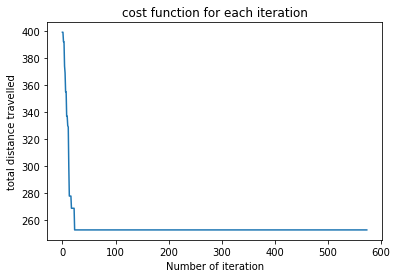


 
 
 for cooling rate=0.8 and for initial temprature 100.5
Best solution: ['J', 'F', 'C', 'G', 'B', 'K', 'I', 'A', 'H', 'E', 'D']
Best distance: 253


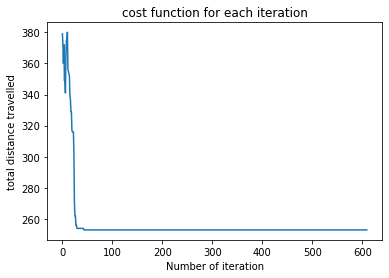


 
 
 for cooling rate=0.8 and for initial temprature 200.5
Best solution: ['K', 'I', 'A', 'E', 'J', 'F', 'D', 'H', 'C', 'G', 'B']
Best distance: 255


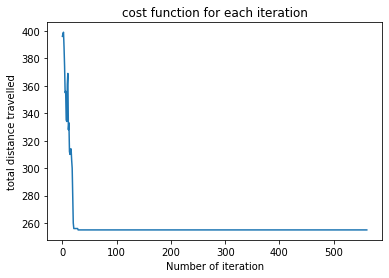


 
 
 for cooling rate=0.8 and for initial temprature 300.5
Best solution: ['J', 'F', 'C', 'G', 'B', 'K', 'I', 'A', 'H', 'E', 'D']
Best distance: 253


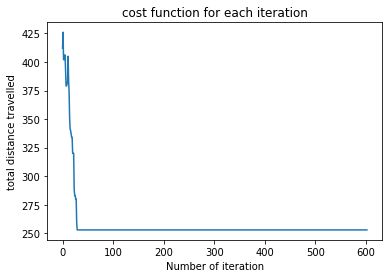


 
 
 for cooling rate=0.8 and for initial temprature 400.5
Best solution: ['J', 'D', 'E', 'H', 'A', 'I', 'K', 'B', 'G', 'C', 'F']
Best distance: 253


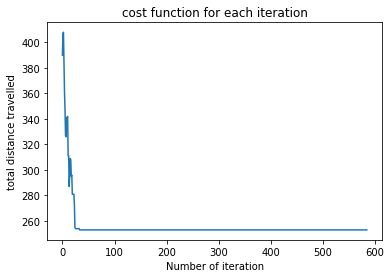


 
 
 for cooling rate=0.8 and for initial temprature 500.5
Best solution: ['E', 'D', 'J', 'F', 'C', 'G', 'B', 'K', 'I', 'A', 'H']
Best distance: 253


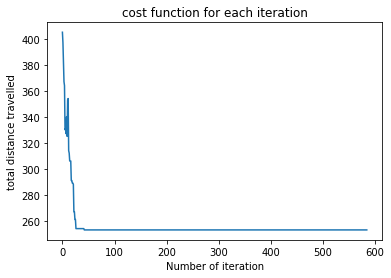


 
 
 for cooling rate=0.8 and for initial temprature 600.5
Best solution: ['K', 'B', 'G', 'C', 'F', 'J', 'D', 'E', 'H', 'A', 'I']
Best distance: 253


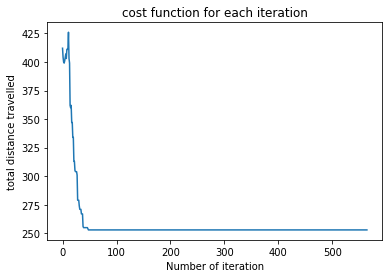


 
 
 for cooling rate=0.8 and for initial temprature 700.5
Best solution: ['E', 'H', 'A', 'I', 'K', 'C', 'B', 'G', 'F', 'J', 'D']
Best distance: 258


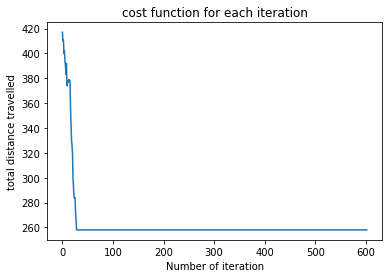


 
 
 for cooling rate=0.8 and for initial temprature 800.5
Best solution: ['G', 'B', 'C', 'K', 'I', 'A', 'H', 'E', 'D', 'J', 'F']
Best distance: 258


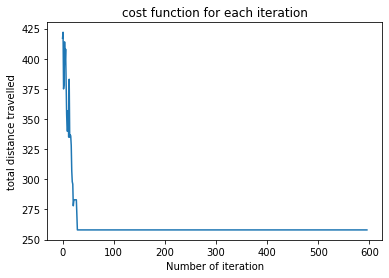


 
 
 for cooling rate=0.8 and for initial temprature 900.5
Best solution: ['I', 'A', 'H', 'E', 'D', 'J', 'F', 'C', 'G', 'B', 'K']
Best distance: 253


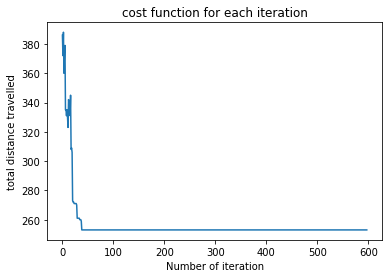


 
 
 for cooling rate=0.81 and for initial temprature 0.5
Best solution: ['A', 'H', 'E', 'D', 'J', 'F', 'G', 'B', 'C', 'K', 'I']
Best distance: 258


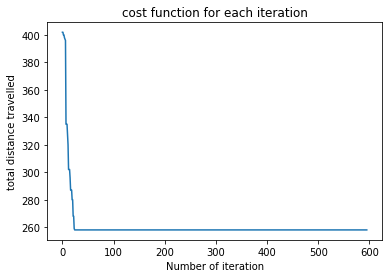


 
 
 for cooling rate=0.81 and for initial temprature 100.5
Best solution: ['K', 'B', 'G', 'C', 'F', 'J', 'D', 'E', 'H', 'A', 'I']
Best distance: 253


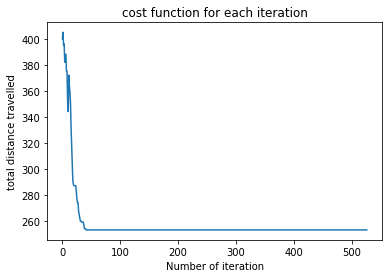


 
 
 for cooling rate=0.81 and for initial temprature 200.5
Best solution: ['E', 'J', 'F', 'D', 'H', 'C', 'G', 'B', 'K', 'I', 'A']
Best distance: 255


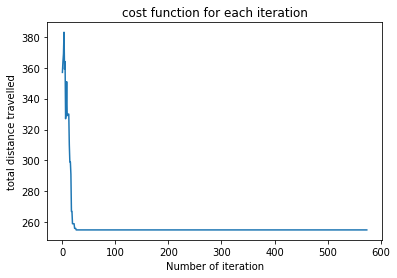


 
 
 for cooling rate=0.81 and for initial temprature 300.5
Best solution: ['F', 'C', 'G', 'B', 'K', 'I', 'A', 'H', 'E', 'D', 'J']
Best distance: 253


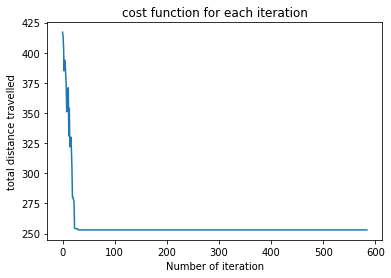


 
 
 for cooling rate=0.81 and for initial temprature 400.5
Best solution: ['B', 'K', 'I', 'A', 'E', 'J', 'F', 'D', 'H', 'C', 'G']
Best distance: 255


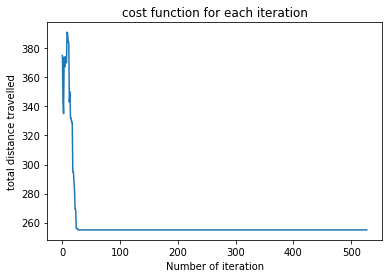


 
 
 for cooling rate=0.81 and for initial temprature 500.5
Best solution: ['G', 'C', 'F', 'J', 'D', 'E', 'H', 'A', 'I', 'K', 'B']
Best distance: 253


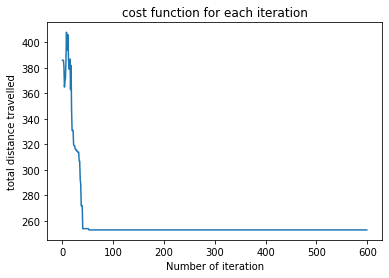


 
 
 for cooling rate=0.81 and for initial temprature 600.5
Best solution: ['A', 'E', 'J', 'F', 'D', 'H', 'C', 'G', 'B', 'K', 'I']
Best distance: 255


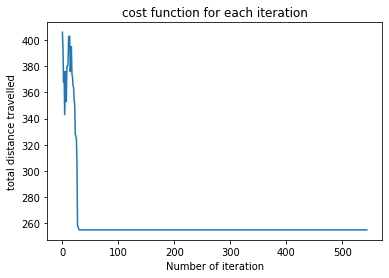


 
 
 for cooling rate=0.81 and for initial temprature 700.5
Best solution: ['E', 'C', 'H', 'A', 'I', 'K', 'B', 'G', 'F', 'J', 'D']
Best distance: 256


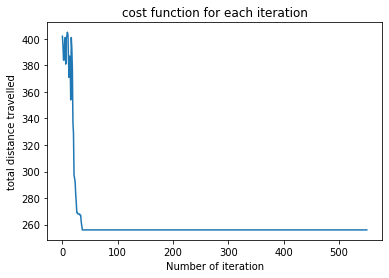


 
 
 for cooling rate=0.81 and for initial temprature 800.5
Best solution: ['D', 'J', 'F', 'C', 'G', 'B', 'K', 'I', 'A', 'H', 'E']
Best distance: 253


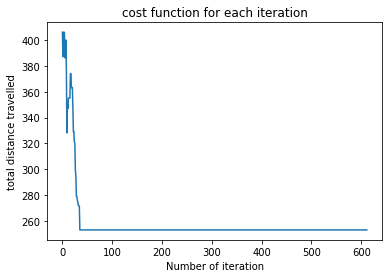


 
 
 for cooling rate=0.81 and for initial temprature 900.5
Best solution: ['J', 'F', 'C', 'G', 'B', 'K', 'I', 'A', 'H', 'E', 'D']
Best distance: 253


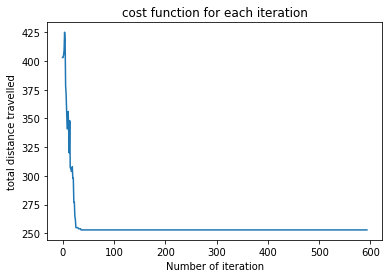


 
 
 for cooling rate=0.8200000000000001 and for initial temprature 0.5
Best solution: ['J', 'F', 'C', 'G', 'B', 'K', 'I', 'A', 'H', 'E', 'D']
Best distance: 253


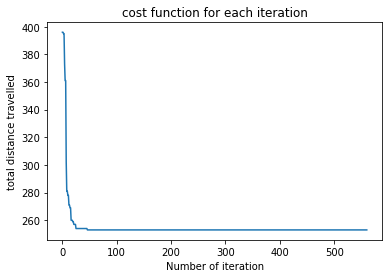


 
 
 for cooling rate=0.8200000000000001 and for initial temprature 100.5
Best solution: ['G', 'B', 'K', 'C', 'H', 'I', 'A', 'E', 'D', 'J', 'F']
Best distance: 256


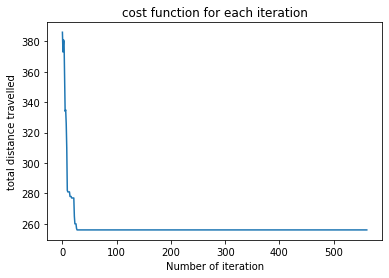


 
 
 for cooling rate=0.8200000000000001 and for initial temprature 200.5
Best solution: ['B', 'K', 'I', 'A', 'H', 'C', 'E', 'D', 'J', 'F', 'G']
Best distance: 256


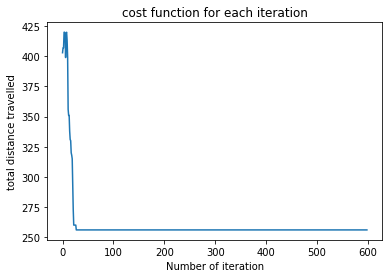


 
 
 for cooling rate=0.8200000000000001 and for initial temprature 300.5
Best solution: ['H', 'D', 'F', 'J', 'E', 'A', 'I', 'K', 'B', 'G', 'C']
Best distance: 255


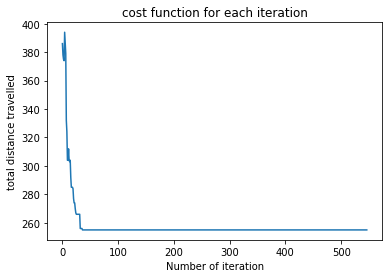


 
 
 for cooling rate=0.8200000000000001 and for initial temprature 400.5
Best solution: ['A', 'I', 'K', 'B', 'G', 'C', 'F', 'J', 'D', 'E', 'H']
Best distance: 253


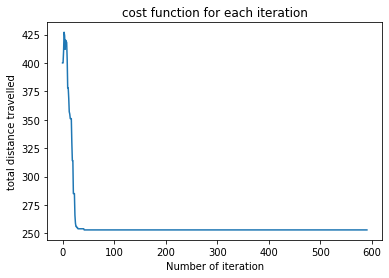


 
 
 for cooling rate=0.8200000000000001 and for initial temprature 500.5
Best solution: ['D', 'E', 'H', 'A', 'I', 'K', 'B', 'G', 'C', 'F', 'J']
Best distance: 253


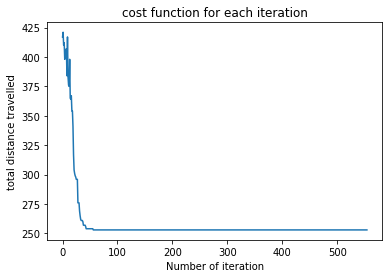


 
 
 for cooling rate=0.8200000000000001 and for initial temprature 600.5
Best solution: ['E', 'D', 'J', 'F', 'G', 'B', 'K', 'I', 'A', 'H', 'C']
Best distance: 256


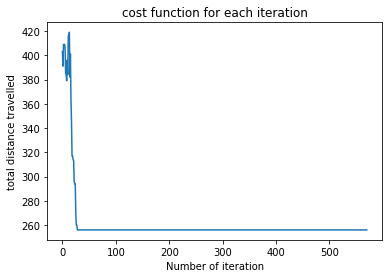


 
 
 for cooling rate=0.8200000000000001 and for initial temprature 700.5
Best solution: ['F', 'C', 'G', 'B', 'K', 'I', 'A', 'H', 'E', 'D', 'J']
Best distance: 253


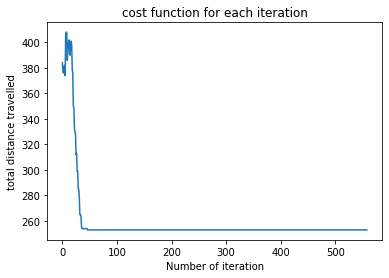


 
 
 for cooling rate=0.8200000000000001 and for initial temprature 800.5
Best solution: ['B', 'K', 'I', 'A', 'H', 'E', 'D', 'J', 'F', 'C', 'G']
Best distance: 253


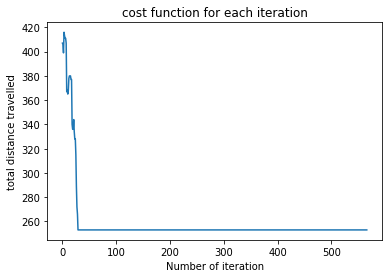


 
 
 for cooling rate=0.8200000000000001 and for initial temprature 900.5
Best solution: ['G', 'F', 'J', 'D', 'E', 'A', 'I', 'H', 'C', 'K', 'B']
Best distance: 256


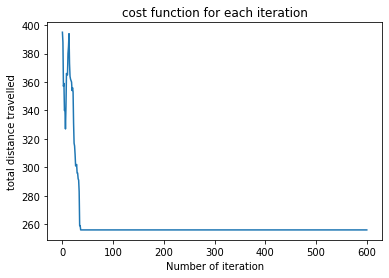


 
 
 for cooling rate=0.8300000000000001 and for initial temprature 0.5
Best solution: ['I', 'A', 'E', 'J', 'F', 'D', 'H', 'C', 'G', 'B', 'K']
Best distance: 255


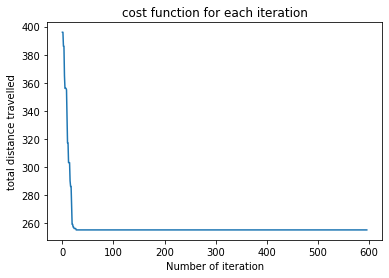


 
 
 for cooling rate=0.8300000000000001 and for initial temprature 100.5
Best solution: ['K', 'I', 'A', 'H', 'E', 'D', 'J', 'F', 'C', 'G', 'B']
Best distance: 253


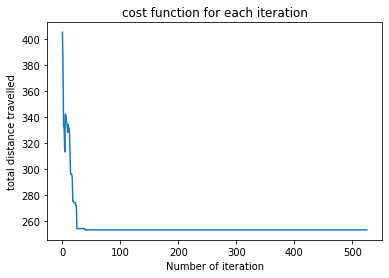


 
 
 for cooling rate=0.8300000000000001 and for initial temprature 200.5
Best solution: ['B', 'K', 'I', 'A', 'H', 'E', 'D', 'J', 'F', 'C', 'G']
Best distance: 253


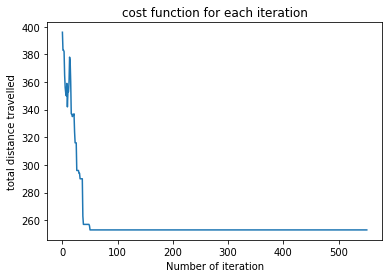


 
 
 for cooling rate=0.8300000000000001 and for initial temprature 300.5
Best solution: ['F', 'J', 'D', 'E', 'C', 'H', 'A', 'I', 'K', 'B', 'G']
Best distance: 256


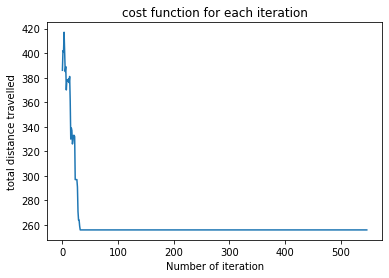


 
 
 for cooling rate=0.8300000000000001 and for initial temprature 400.5
Best solution: ['I', 'K', 'B', 'G', 'C', 'F', 'J', 'D', 'E', 'H', 'A']
Best distance: 253


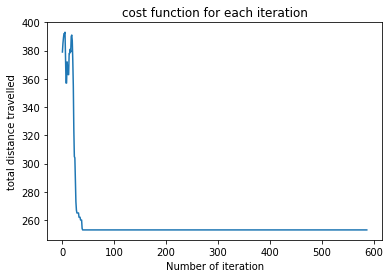


 
 
 for cooling rate=0.8300000000000001 and for initial temprature 500.5
Best solution: ['E', 'D', 'J', 'F', 'C', 'G', 'B', 'K', 'I', 'A', 'H']
Best distance: 253


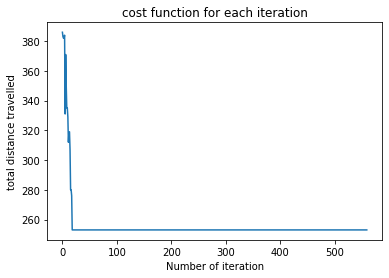


 
 
 for cooling rate=0.8300000000000001 and for initial temprature 600.5
Best solution: ['A', 'I', 'K', 'B', 'G', 'F', 'J', 'D', 'E', 'C', 'H']
Best distance: 256


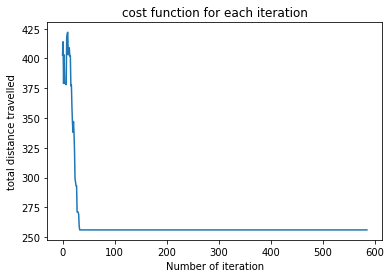


 
 
 for cooling rate=0.8300000000000001 and for initial temprature 700.5
Best solution: ['C', 'G', 'B', 'K', 'I', 'A', 'E', 'J', 'F', 'D', 'H']
Best distance: 255


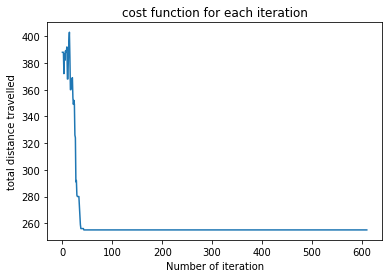


 
 
 for cooling rate=0.8300000000000001 and for initial temprature 800.5
Best solution: ['A', 'H', 'E', 'D', 'J', 'F', 'G', 'B', 'C', 'K', 'I']
Best distance: 258


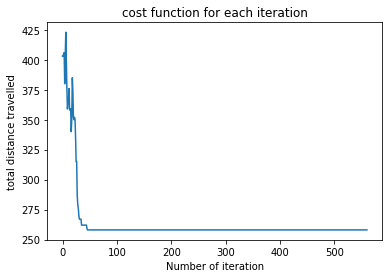


 
 
 for cooling rate=0.8300000000000001 and for initial temprature 900.5
Best solution: ['G', 'B', 'K', 'I', 'A', 'E', 'J', 'F', 'D', 'H', 'C']
Best distance: 255


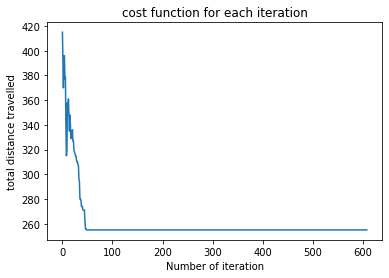


 
 
 for cooling rate=0.8400000000000001 and for initial temprature 0.5
Best solution: ['I', 'K', 'B', 'G', 'F', 'J', 'D', 'E', 'C', 'H', 'A']
Best distance: 256


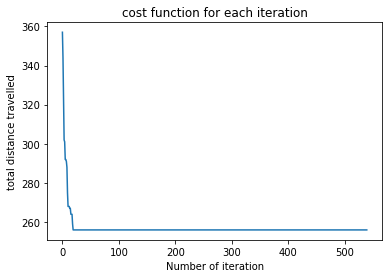


 
 
 for cooling rate=0.8400000000000001 and for initial temprature 100.5
Best solution: ['F', 'C', 'G', 'B', 'K', 'I', 'A', 'H', 'E', 'D', 'J']
Best distance: 253


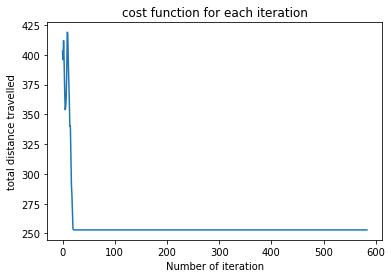


 
 
 for cooling rate=0.8400000000000001 and for initial temprature 200.5
Best solution: ['A', 'E', 'D', 'J', 'F', 'G', 'B', 'K', 'C', 'H', 'I']
Best distance: 256


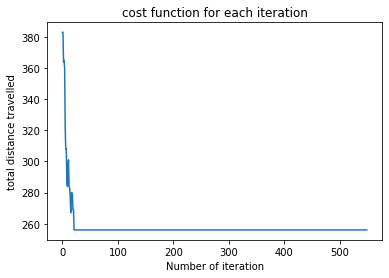


 
 
 for cooling rate=0.8400000000000001 and for initial temprature 300.5
Best solution: ['B', 'G', 'C', 'F', 'J', 'D', 'E', 'H', 'A', 'I', 'K']
Best distance: 253


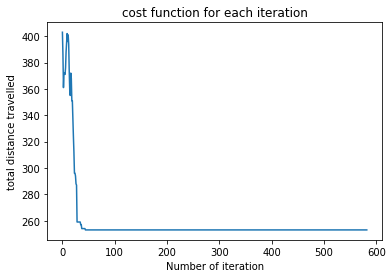


 
 
 for cooling rate=0.8400000000000001 and for initial temprature 400.5
Best solution: ['D', 'F', 'J', 'E', 'A', 'I', 'K', 'B', 'G', 'C', 'H']
Best distance: 255


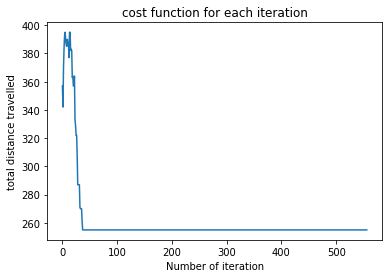


 
 
 for cooling rate=0.8400000000000001 and for initial temprature 500.5
Best solution: ['G', 'C', 'F', 'J', 'D', 'E', 'H', 'A', 'I', 'K', 'B']
Best distance: 253


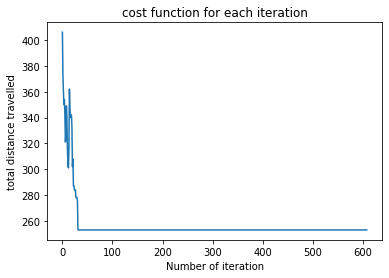


 
 
 for cooling rate=0.8400000000000001 and for initial temprature 600.5
Best solution: ['H', 'D', 'F', 'J', 'E', 'A', 'I', 'K', 'B', 'G', 'C']
Best distance: 255


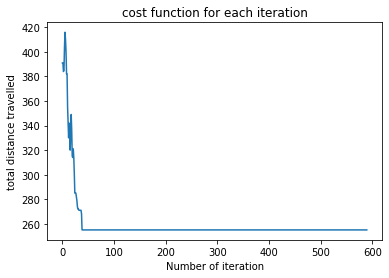


 
 
 for cooling rate=0.8400000000000001 and for initial temprature 700.5
Best solution: ['D', 'H', 'C', 'G', 'B', 'K', 'I', 'A', 'E', 'J', 'F']
Best distance: 255


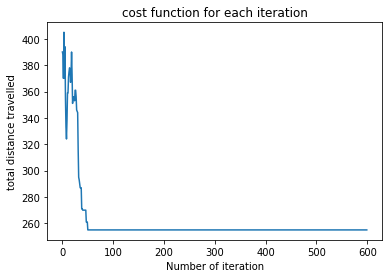


 
 
 for cooling rate=0.8400000000000001 and for initial temprature 800.5
Best solution: ['E', 'J', 'F', 'D', 'H', 'C', 'G', 'B', 'K', 'I', 'A']
Best distance: 255


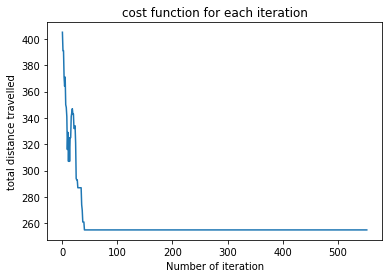


 
 
 for cooling rate=0.8400000000000001 and for initial temprature 900.5
Best solution: ['E', 'H', 'A', 'I', 'K', 'B', 'G', 'C', 'F', 'J', 'D']
Best distance: 253


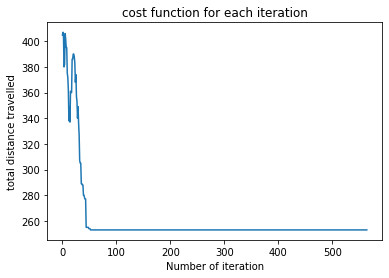


 
 
 for cooling rate=0.8500000000000001 and for initial temprature 0.5
Best solution: ['B', 'G', 'C', 'H', 'D', 'F', 'J', 'E', 'A', 'I', 'K']
Best distance: 255


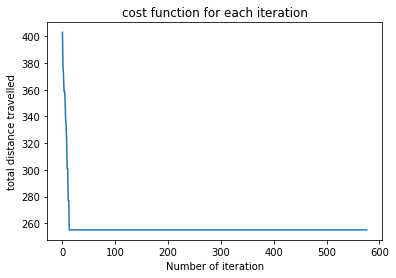


 
 
 for cooling rate=0.8500000000000001 and for initial temprature 100.5
Best solution: ['F', 'D', 'H', 'C', 'G', 'B', 'K', 'I', 'A', 'E', 'J']
Best distance: 255


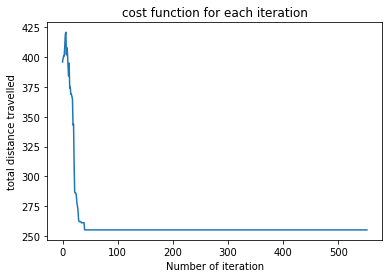


 
 
 for cooling rate=0.8500000000000001 and for initial temprature 200.5
Best solution: ['F', 'J', 'D', 'E', 'H', 'A', 'I', 'K', 'B', 'G', 'C']
Best distance: 253


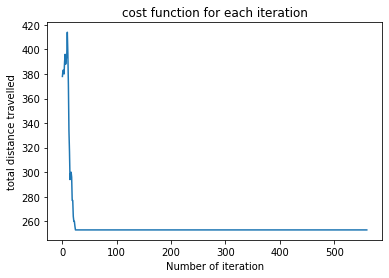


 
 
 for cooling rate=0.8500000000000001 and for initial temprature 300.5
Best solution: ['I', 'K', 'B', 'G', 'F', 'J', 'D', 'E', 'C', 'H', 'A']
Best distance: 256


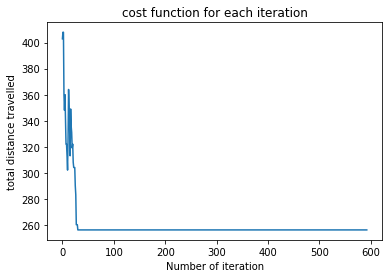


 
 
 for cooling rate=0.8500000000000001 and for initial temprature 400.5
Best solution: ['J', 'D', 'E', 'H', 'A', 'I', 'K', 'B', 'G', 'C', 'F']
Best distance: 253


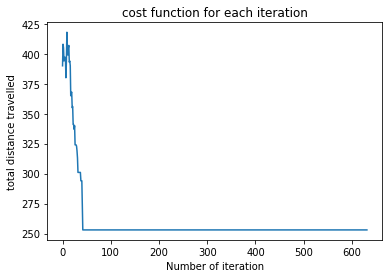


 
 
 for cooling rate=0.8500000000000001 and for initial temprature 500.5
Best solution: ['C', 'G', 'B', 'K', 'I', 'A', 'H', 'E', 'D', 'J', 'F']
Best distance: 253


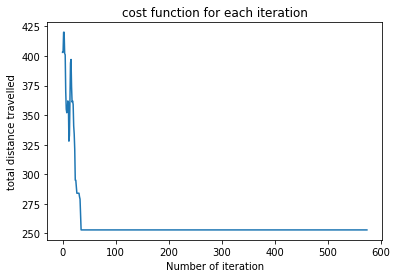


 
 
 for cooling rate=0.8500000000000001 and for initial temprature 600.5
Best solution: ['E', 'D', 'J', 'F', 'G', 'B', 'K', 'I', 'A', 'H', 'C']
Best distance: 256


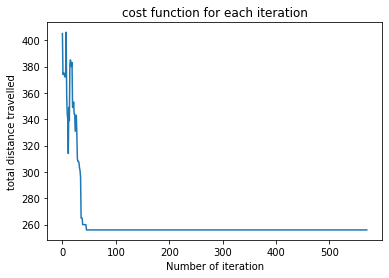


 
 
 for cooling rate=0.8500000000000001 and for initial temprature 700.5
Best solution: ['G', 'B', 'K', 'C', 'H', 'I', 'A', 'E', 'D', 'J', 'F']
Best distance: 256


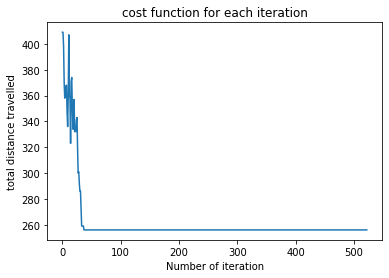


 
 
 for cooling rate=0.8500000000000001 and for initial temprature 800.5
Best solution: ['A', 'E', 'J', 'F', 'D', 'H', 'C', 'G', 'B', 'K', 'I']
Best distance: 255


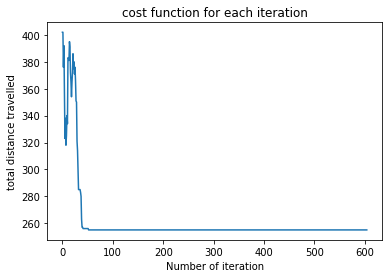


 
 
 for cooling rate=0.8500000000000001 and for initial temprature 900.5
Best solution: ['J', 'F', 'C', 'G', 'B', 'K', 'I', 'A', 'H', 'E', 'D']
Best distance: 253


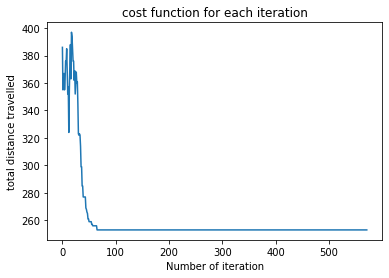


 
 
 for cooling rate=0.8600000000000001 and for initial temprature 0.5
Best solution: ['A', 'H', 'E', 'D', 'J', 'F', 'C', 'G', 'B', 'K', 'I']
Best distance: 253


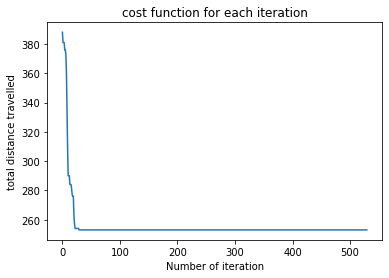


 
 
 for cooling rate=0.8600000000000001 and for initial temprature 100.5
Best solution: ['G', 'F', 'J', 'D', 'E', 'A', 'I', 'H', 'C', 'K', 'B']
Best distance: 256


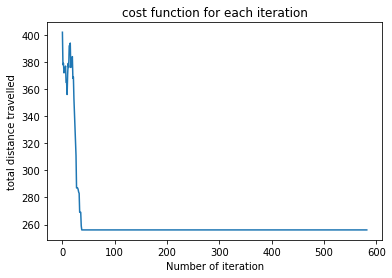


 
 
 for cooling rate=0.8600000000000001 and for initial temprature 200.5
Best solution: ['H', 'E', 'D', 'J', 'F', 'C', 'G', 'B', 'K', 'I', 'A']
Best distance: 253


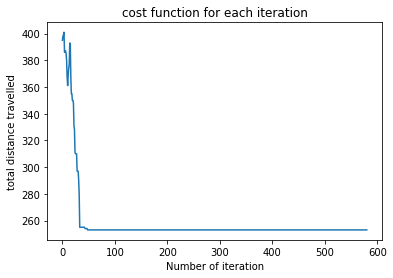


 
 
 for cooling rate=0.8600000000000001 and for initial temprature 300.5
Best solution: ['H', 'A', 'I', 'K', 'B', 'G', 'C', 'F', 'J', 'D', 'E']
Best distance: 253


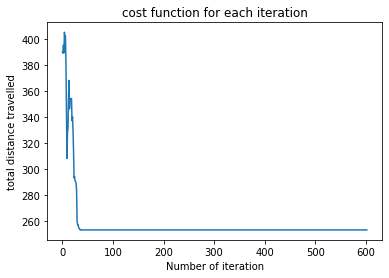


 
 
 for cooling rate=0.8600000000000001 and for initial temprature 400.5
Best solution: ['B', 'G', 'C', 'H', 'D', 'F', 'J', 'E', 'A', 'I', 'K']
Best distance: 255


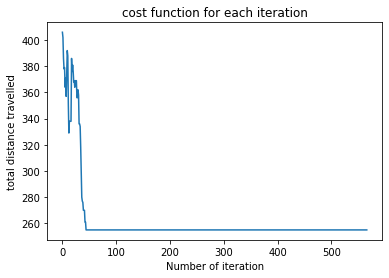


 
 
 for cooling rate=0.8600000000000001 and for initial temprature 500.5
Best solution: ['B', 'G', 'F', 'J', 'D', 'E', 'A', 'I', 'H', 'C', 'K']
Best distance: 256


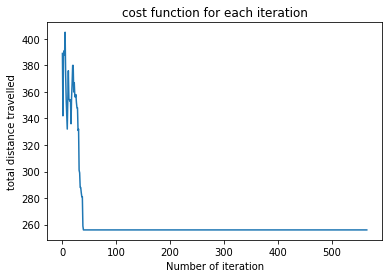


 
 
 for cooling rate=0.8600000000000001 and for initial temprature 600.5
Best solution: ['K', 'I', 'A', 'H', 'E', 'D', 'J', 'F', 'C', 'G', 'B']
Best distance: 253


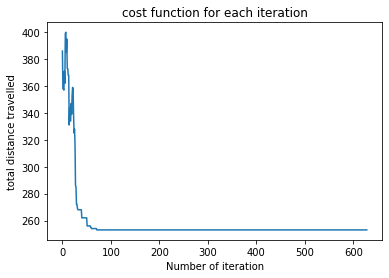


 
 
 for cooling rate=0.8600000000000001 and for initial temprature 700.5
Best solution: ['A', 'I', 'K', 'C', 'B', 'G', 'F', 'J', 'D', 'E', 'H']
Best distance: 258


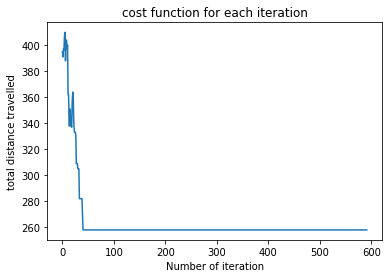


 
 
 for cooling rate=0.8600000000000001 and for initial temprature 800.5
Best solution: ['F', 'G', 'B', 'K', 'C', 'H', 'I', 'A', 'E', 'D', 'J']
Best distance: 256


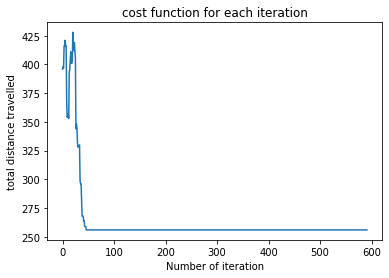


 
 
 for cooling rate=0.8600000000000001 and for initial temprature 900.5
Best solution: ['F', 'D', 'H', 'C', 'G', 'B', 'K', 'I', 'A', 'E', 'J']
Best distance: 255


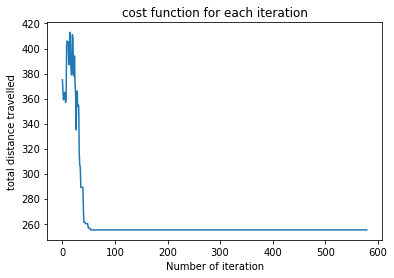


 
 
 for cooling rate=0.8700000000000001 and for initial temprature 0.5
Best solution: ['F', 'G', 'B', 'K', 'C', 'H', 'I', 'A', 'E', 'D', 'J']
Best distance: 256


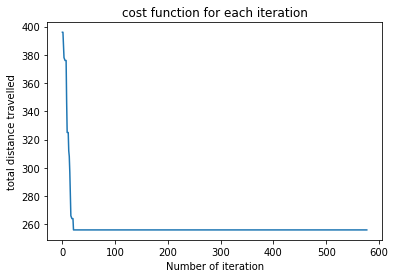


 
 
 for cooling rate=0.8700000000000001 and for initial temprature 100.5
Best solution: ['J', 'F', 'G', 'B', 'K', 'I', 'A', 'H', 'C', 'E', 'D']
Best distance: 256


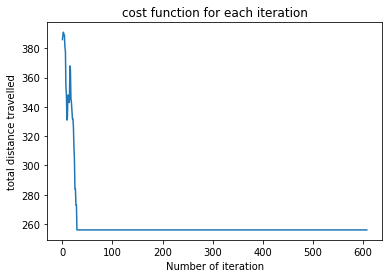


 
 
 for cooling rate=0.8700000000000001 and for initial temprature 200.5
Best solution: ['G', 'B', 'K', 'I', 'A', 'H', 'E', 'D', 'J', 'F', 'C']
Best distance: 253


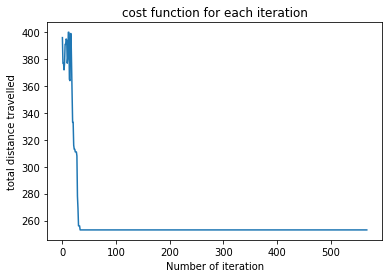


 
 
 for cooling rate=0.8700000000000001 and for initial temprature 300.5
Best solution: ['J', 'F', 'G', 'B', 'K', 'C', 'H', 'I', 'A', 'E', 'D']
Best distance: 256


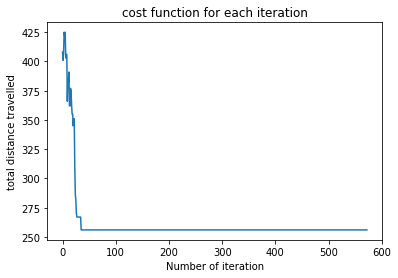


 
 
 for cooling rate=0.8700000000000001 and for initial temprature 400.5
Best solution: ['E', 'D', 'J', 'F', 'G', 'B', 'K', 'C', 'H', 'I', 'A']
Best distance: 256


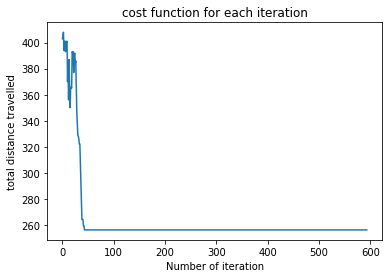


 
 
 for cooling rate=0.8700000000000001 and for initial temprature 500.5
Best solution: ['H', 'I', 'A', 'E', 'D', 'J', 'F', 'G', 'B', 'K', 'C']
Best distance: 256


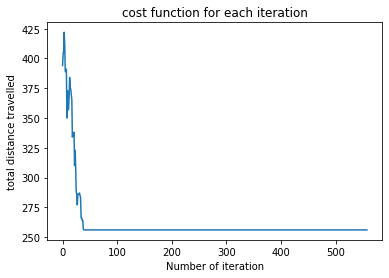


 
 
 for cooling rate=0.8700000000000001 and for initial temprature 600.5
Best solution: ['E', 'D', 'J', 'F', 'G', 'B', 'K', 'C', 'H', 'I', 'A']
Best distance: 256


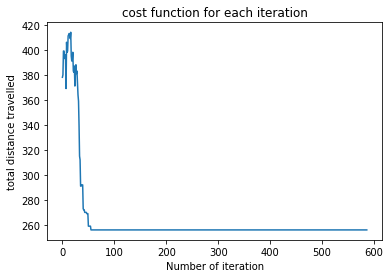


 
 
 for cooling rate=0.8700000000000001 and for initial temprature 700.5
Best solution: ['I', 'K', 'C', 'B', 'G', 'F', 'J', 'D', 'E', 'H', 'A']
Best distance: 258


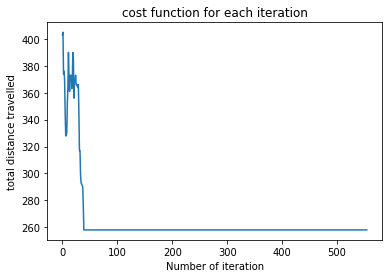


 
 
 for cooling rate=0.8700000000000001 and for initial temprature 800.5
Best solution: ['E', 'J', 'F', 'D', 'H', 'C', 'G', 'B', 'K', 'I', 'A']
Best distance: 255


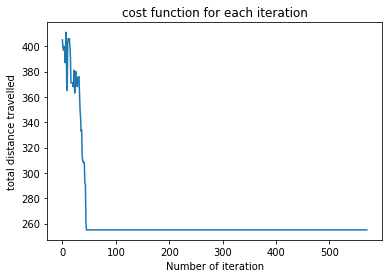


 
 
 for cooling rate=0.8700000000000001 and for initial temprature 900.5
Best solution: ['F', 'C', 'G', 'B', 'K', 'I', 'A', 'H', 'E', 'D', 'J']
Best distance: 253


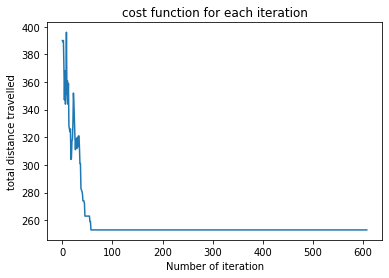


 
 
 for cooling rate=0.88 and for initial temprature 0.5
Best solution: ['C', 'K', 'I', 'A', 'H', 'E', 'D', 'J', 'F', 'G', 'B']
Best distance: 258


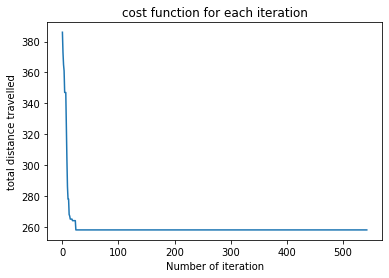


 
 
 for cooling rate=0.88 and for initial temprature 100.5
Best solution: ['B', 'G', 'C', 'F', 'J', 'D', 'E', 'H', 'A', 'I', 'K']
Best distance: 253


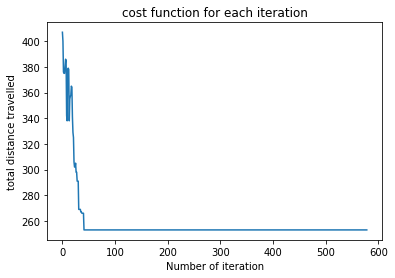


 
 
 for cooling rate=0.88 and for initial temprature 200.5
Best solution: ['G', 'B', 'K', 'I', 'A', 'E', 'J', 'F', 'D', 'H', 'C']
Best distance: 255


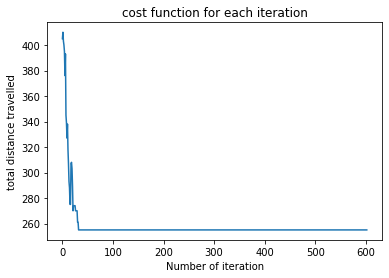


 
 
 for cooling rate=0.88 and for initial temprature 300.5
Best solution: ['A', 'I', 'K', 'B', 'G', 'C', 'F', 'J', 'D', 'E', 'H']
Best distance: 253


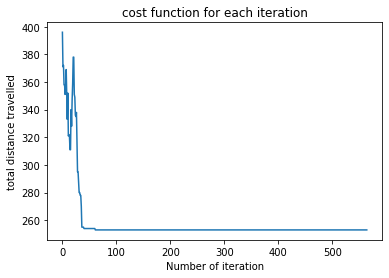


 
 
 for cooling rate=0.88 and for initial temprature 400.5
Best solution: ['H', 'I', 'A', 'E', 'D', 'J', 'F', 'G', 'B', 'K', 'C']
Best distance: 256


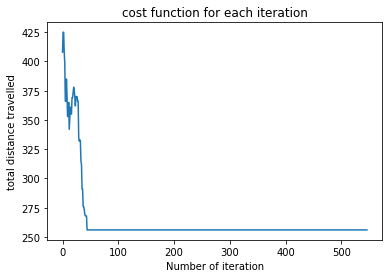


 
 
 for cooling rate=0.88 and for initial temprature 500.5
Best solution: ['D', 'J', 'F', 'G', 'B', 'C', 'K', 'I', 'A', 'H', 'E']
Best distance: 258


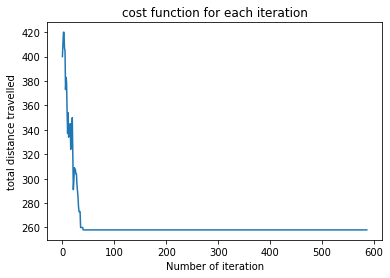


 
 
 for cooling rate=0.88 and for initial temprature 600.5
Best solution: ['G', 'C', 'F', 'J', 'D', 'E', 'H', 'A', 'I', 'K', 'B']
Best distance: 253


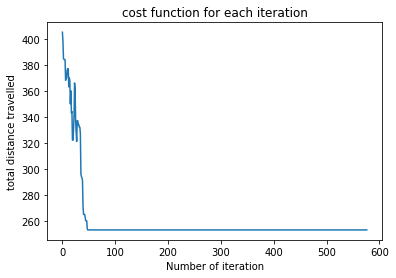


 
 
 for cooling rate=0.88 and for initial temprature 700.5
Best solution: ['H', 'E', 'D', 'J', 'F', 'C', 'G', 'B', 'K', 'I', 'A']
Best distance: 253


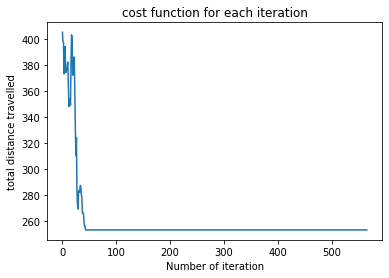


 
 
 for cooling rate=0.88 and for initial temprature 800.5
Best solution: ['E', 'H', 'A', 'I', 'K', 'B', 'G', 'C', 'F', 'J', 'D']
Best distance: 253


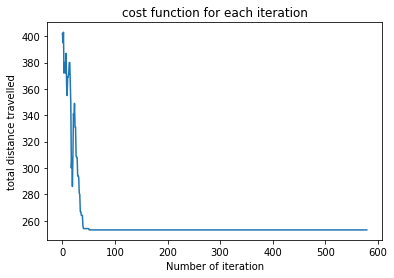


 
 
 for cooling rate=0.88 and for initial temprature 900.5
Best solution: ['J', 'D', 'E', 'H', 'A', 'I', 'K', 'C', 'B', 'G', 'F']
Best distance: 258


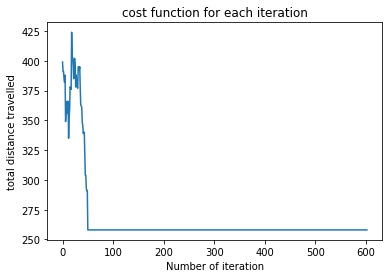


 
 
 for cooling rate=0.89 and for initial temprature 0.5
Best solution: ['D', 'E', 'H', 'A', 'I', 'K', 'C', 'B', 'G', 'F', 'J']
Best distance: 258


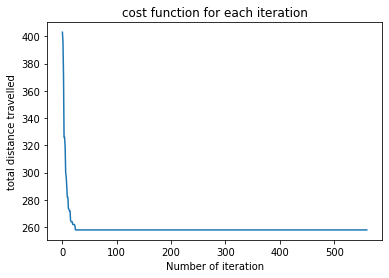


 
 
 for cooling rate=0.89 and for initial temprature 100.5
Best solution: ['J', 'F', 'G', 'B', 'C', 'K', 'I', 'A', 'H', 'E', 'D']
Best distance: 258


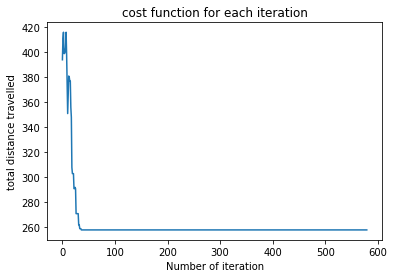


 
 
 for cooling rate=0.89 and for initial temprature 200.5
Best solution: ['H', 'E', 'D', 'J', 'F', 'C', 'G', 'B', 'K', 'I', 'A']
Best distance: 253


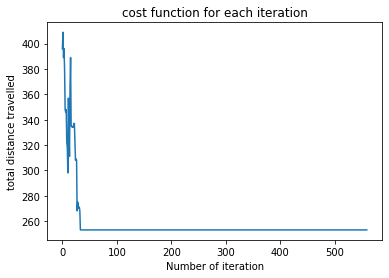


 
 
 for cooling rate=0.89 and for initial temprature 300.5
Best solution: ['I', 'A', 'E', 'J', 'F', 'D', 'H', 'C', 'G', 'B', 'K']
Best distance: 255


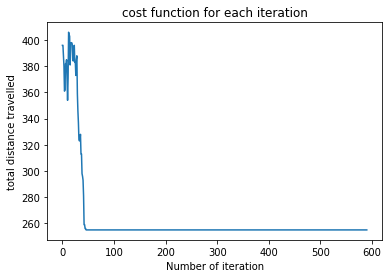


 
 
 for cooling rate=0.89 and for initial temprature 400.5
Best solution: ['D', 'E', 'H', 'A', 'I', 'K', 'B', 'G', 'C', 'F', 'J']
Best distance: 253


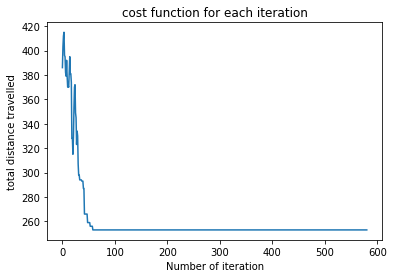


 
 
 for cooling rate=0.89 and for initial temprature 500.5
Best solution: ['B', 'K', 'I', 'A', 'H', 'C', 'E', 'D', 'J', 'F', 'G']
Best distance: 256


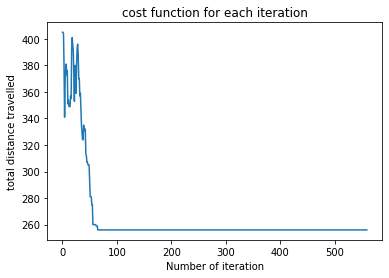


 
 
 for cooling rate=0.89 and for initial temprature 600.5
Best solution: ['J', 'F', 'C', 'G', 'B', 'K', 'I', 'A', 'H', 'E', 'D']
Best distance: 253


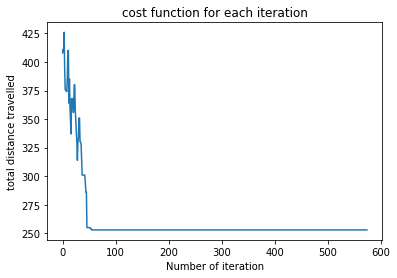


 
 
 for cooling rate=0.89 and for initial temprature 700.5
Best solution: ['H', 'D', 'F', 'J', 'E', 'A', 'I', 'K', 'B', 'G', 'C']
Best distance: 255


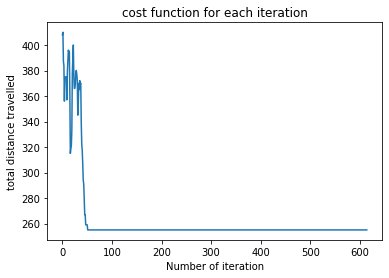


 
 
 for cooling rate=0.89 and for initial temprature 800.5
Best solution: ['J', 'F', 'G', 'B', 'C', 'K', 'I', 'A', 'H', 'E', 'D']
Best distance: 258


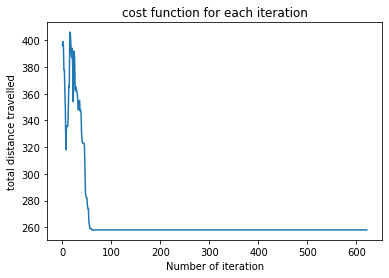


 
 
 for cooling rate=0.89 and for initial temprature 900.5
Best solution: ['D', 'J', 'F', 'C', 'G', 'B', 'K', 'I', 'A', 'H', 'E']
Best distance: 253


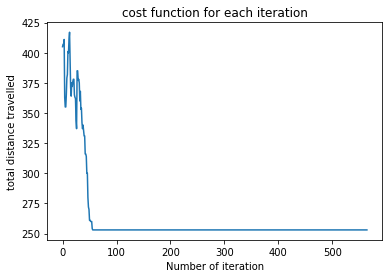

In [28]:
for i in [0.8+0.01*x for x in range(10)]:
  for j in [0.5+100*i for i in range(10)]:
    print(f"\n \n \n for cooling rate={i} and for initial temprature {j}")
    best_solution, best_distance,cost_list = simulated_annealing(distances, initial_solution,j,i,10000)
    print("Best solution:", best_solution)
    print("Best distance:", best_distance)
    plt.plot(cost_list)
    plt.xlabel("Number of iteration")
    plt.ylabel('total distance travelled')
    plt.title('cost function for each iteration')
    plt.show()


 
 
 for cooling rate=0.8 and for initial temprature 0.5
Best solution: ['D', 'J', 'F', 'C', 'G', 'B', 'K', 'I', 'A', 'H', 'E']
Best distance: 253.0


<ipython-input-5-e55677d51a91>:26: RuntimeWarning: overflow encountered in double_scalars
  if delta_distance < 0 or math.exp(-delta_distance / temperature) > random.random():


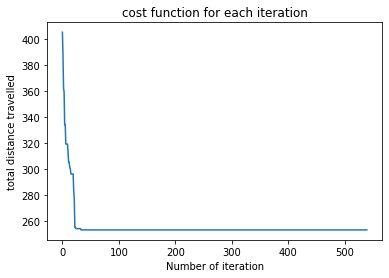


 
 
 for cooling rate=0.8 and for initial temprature 1
Best solution: ['B', 'G', 'C', 'F', 'J', 'D', 'E', 'H', 'A', 'I', 'K']
Best distance: 253.0


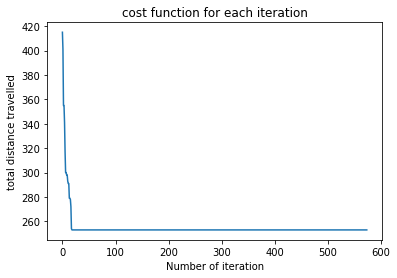


 
 
 for cooling rate=0.8 and for initial temprature 1.5
Best solution: ['C', 'G', 'B', 'K', 'I', 'A', 'H', 'E', 'D', 'J', 'F']
Best distance: 253.0


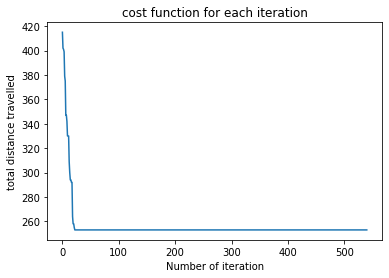

In [ ]:
for i in [0.80]:
  for j in [0.5,1,1.5]:
    print(f"\n \n \n for cooling rate={i} and for initial temprature {j}")
    best_solution, best_distance,cost_list = simulated_annealing(distances, initial_solution,j,i,10000)
    print("Best solution:", best_solution)
    print("Best distance:", best_distance)
    plt.plot(cost_list)
    plt.xlabel("Number of iteration")
    plt.ylabel('total distance travelled')
    plt.title('cost function for each iteration')
    plt.show()

In [29]:
distances =data_48

# Define the initial solution
cities = [str(i) for i in range(1,49)]
initial_solution = random.sample(cities, len(cities))


 
 
 for cooling rate=0.85 and for initial temprature 0.5


<ipython-input-5-e55677d51a91>:26: RuntimeWarning: overflow encountered in double_scalars
  if delta_distance < 0 or math.exp(-delta_distance / temperature) > random.random():


Best solution: ['33', '46', '31', '44', '18', '7', '36', '28', '6', '37', '19', '27', '17', '43', '30', '20', '47', '21', '32', '39', '48', '5', '24', '10', '45', '35', '4', '26', '42', '2', '29', '41', '34', '14', '25', '13', '11', '23', '3', '22', '16', '1', '8', '38', '9', '40', '15', '12']
Best distance: 35126.0


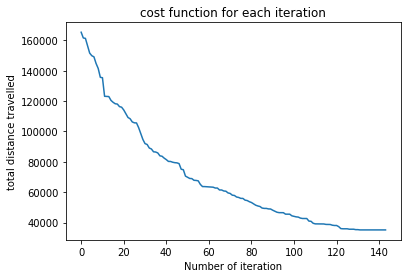


 
 
 for cooling rate=0.85 and for initial temprature 0.8
Best solution: ['42', '5', '29', '2', '41', '16', '22', '1', '8', '9', '40', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '20', '15', '12', '11', '47', '13', '21', '32', '39', '25', '14', '23', '3', '34', '48', '24', '10', '45', '35', '4', '26']
Best distance: 37130.0


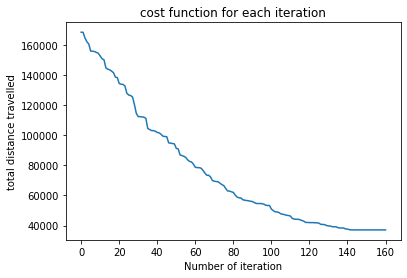


 
 
 for cooling rate=0.85 and for initial temprature 1
Best solution: ['17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '16', '22', '3', '34', '41', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '39', '32', '21', '13', '25', '14', '23', '40', '15', '12', '11', '47', '20', '33', '46', '36', '30', '43']
Best distance: 34092.0


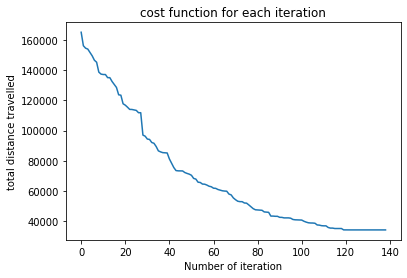


 
 
 for cooling rate=0.85 and for initial temprature 100
Best solution: ['6', '28', '7', '18', '44', '31', '46', '15', '40', '9', '38', '8', '1', '16', '22', '3', '34', '41', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '32', '39', '25', '14', '23', '13', '21', '47', '20', '11', '12', '33', '36', '30', '43', '17', '27', '19', '37']
Best distance: 35191.0


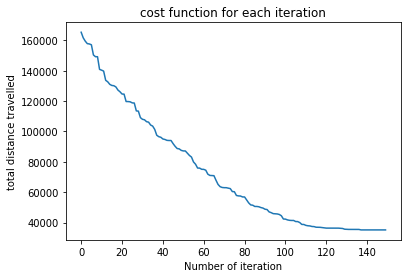


 
 
 for cooling rate=0.85 and for initial temprature 500
Best solution: ['28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '15', '40', '3', '34', '5', '48', '25', '14', '23', '11', '12', '20', '47', '13', '21', '39', '32', '24', '45', '35', '4', '26', '10', '42', '2', '29', '41', '16', '22', '1', '8', '9', '38', '31', '44', '18', '7']
Best distance: 35692.0


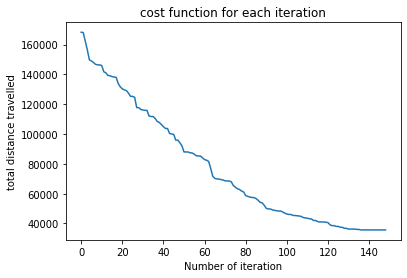


 
 
 for cooling rate=0.85 and for initial temprature 1000
Best solution: ['47', '20', '33', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '8', '1', '9', '46', '15', '40', '22', '16', '3', '23', '11', '12', '13', '25', '14', '34', '41', '2', '29', '5', '48', '42', '26', '4', '35', '45', '10', '24', '32', '39', '21']
Best distance: 36176.0


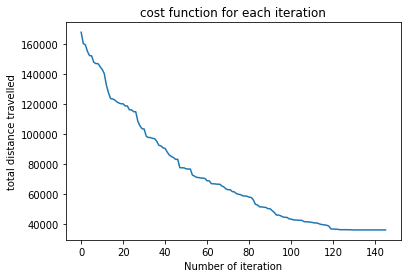


 
 
 for cooling rate=0.85 and for initial temprature 2000
Best solution: ['44', '31', '38', '9', '8', '1', '16', '22', '40', '15', '12', '3', '41', '34', '5', '29', '2', '26', '4', '35', '45', '10', '24', '42', '48', '39', '32', '21', '13', '25', '14', '23', '11', '47', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18']
Best distance: 35557.0


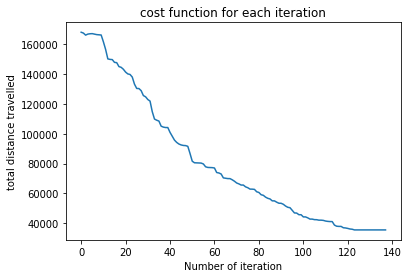


 
 
 for cooling rate=0.85 and for initial temprature 3000
Best solution: ['36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '40', '15', '12', '11', '23', '13', '25', '14', '3', '22', '16', '41', '34', '48', '5', '29', '2', '26', '4', '35', '45', '10', '42', '24', '32', '39', '21', '47', '20', '33', '46']
Best distance: 34260.0


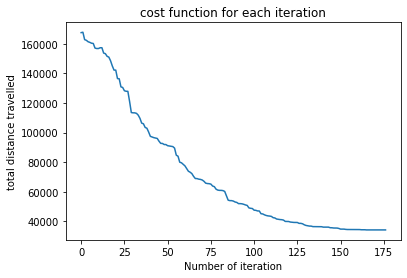


 
 
 for cooling rate=0.85 and for initial temprature 4000
Best solution: ['33', '20', '47', '12', '11', '13', '21', '32', '24', '10', '45', '35', '4', '26', '42', '2', '29', '5', '48', '39', '25', '14', '23', '3', '34', '41', '16', '22', '1', '8', '9', '40', '15', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46']
Best distance: 35125.0


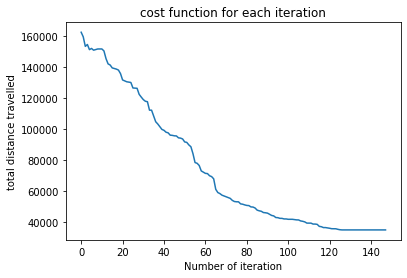


 
 
 for cooling rate=0.85 and for initial temprature 5000
Best solution: ['38', '9', '8', '1', '16', '22', '3', '34', '41', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '39', '32', '21', '13', '25', '14', '23', '11', '47', '20', '33', '12', '40', '15', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31']
Best distance: 33984.0


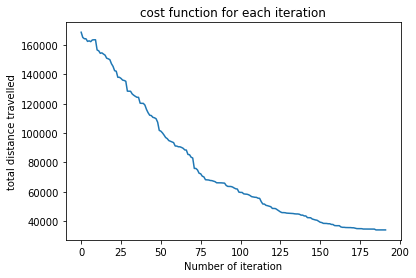


 
 
 for cooling rate=0.85 and for initial temprature 10000
Best solution: ['13', '21', '47', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '22', '16', '41', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '32', '39', '25', '14', '23', '34', '3', '40', '15', '12', '11']
Best distance: 34715.0


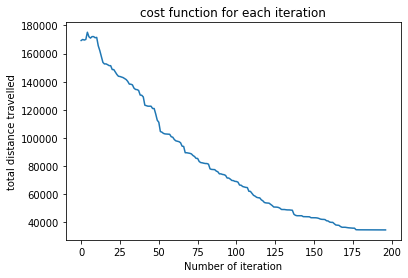


 
 
 for cooling rate=0.86 and for initial temprature 0.5
Best solution: ['20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '22', '16', '41', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '32', '39', '25', '14', '34', '3', '40', '15', '12', '11', '23', '13', '21', '47']
Best distance: 34233.0


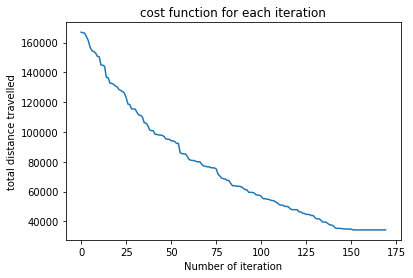


 
 
 for cooling rate=0.86 and for initial temprature 0.8
Best solution: ['44', '31', '38', '8', '9', '40', '15', '46', '33', '12', '11', '23', '14', '3', '1', '22', '16', '41', '34', '48', '5', '29', '2', '42', '26', '4', '35', '45', '10', '24', '32', '39', '25', '13', '21', '47', '20', '43', '17', '27', '19', '37', '6', '30', '28', '36', '7', '18']
Best distance: 35733.0


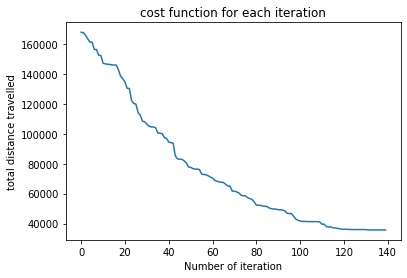


 
 
 for cooling rate=0.86 and for initial temprature 1
Best solution: ['34', '14', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '39', '32', '21', '13', '25', '23', '11', '47', '20', '12', '15', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '40', '3', '22', '16', '41']
Best distance: 34785.0


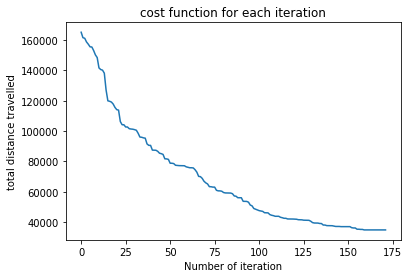


 
 
 for cooling rate=0.86 and for initial temprature 100
Best solution: ['9', '8', '1', '40', '15', '12', '11', '23', '25', '14', '34', '3', '22', '16', '41', '2', '29', '5', '42', '10', '26', '4', '35', '45', '24', '48', '39', '32', '21', '13', '47', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38']
Best distance: 35565.0


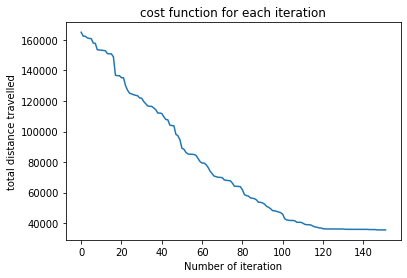


 
 
 for cooling rate=0.86 and for initial temprature 500
Best solution: ['18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '15', '9', '40', '12', '33', '20', '47', '11', '23', '13', '21', '32', '39', '48', '42', '24', '10', '45', '35', '4', '26', '2', '29', '5', '25', '14', '34', '41', '3', '22', '16', '1', '8', '38', '31', '44']
Best distance: 35653.0


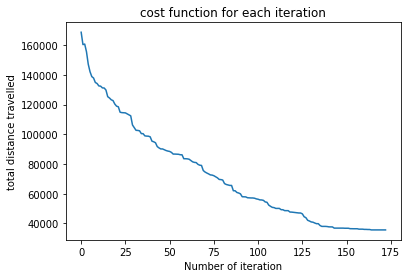


 
 
 for cooling rate=0.86 and for initial temprature 1000
Best solution: ['41', '34', '29', '2', '42', '10', '26', '4', '35', '45', '24', '48', '5', '25', '39', '32', '21', '13', '47', '11', '12', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '15', '40', '23', '14', '3', '22', '1', '9', '8', '16']
Best distance: 37203.0


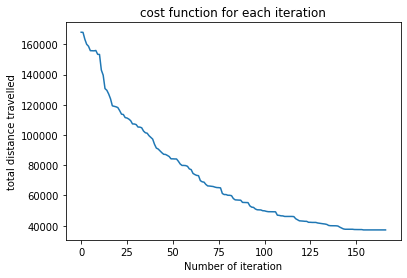


 
 
 for cooling rate=0.86 and for initial temprature 2000
Best solution: ['1', '8', '9', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '15', '33', '20', '12', '11', '23', '14', '25', '13', '47', '21', '39', '32', '24', '10', '45', '35', '4', '26', '42', '48', '5', '29', '2', '41', '34', '3', '16', '22', '40']
Best distance: 34857.0


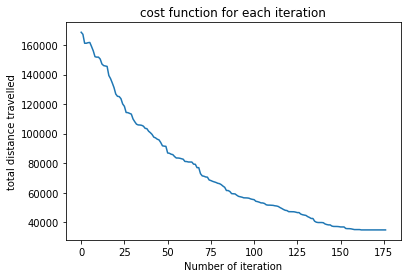


 
 
 for cooling rate=0.86 and for initial temprature 3000
Best solution: ['40', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '16', '22', '3', '34', '41', '29', '2', '26', '4', '35', '45', '10', '42', '5', '48', '24', '32', '39', '21', '47', '13', '25', '14', '23', '11', '12', '20', '33', '15']
Best distance: 35110.0


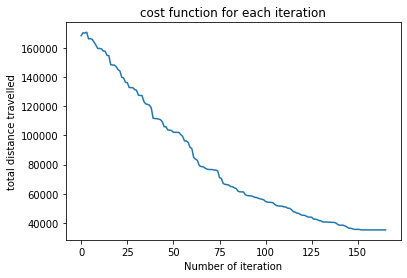


 
 
 for cooling rate=0.86 and for initial temprature 4000
Best solution: ['43', '30', '36', '46', '15', '40', '12', '33', '20', '47', '21', '11', '23', '13', '25', '39', '32', '24', '45', '35', '4', '26', '10', '42', '48', '5', '29', '2', '41', '34', '14', '3', '22', '16', '1', '8', '9', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17']
Best distance: 35701.0


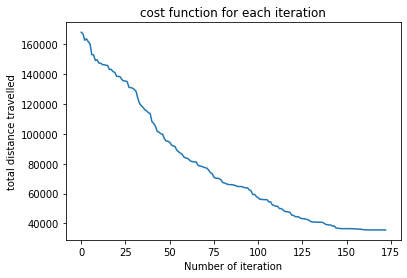


 
 
 for cooling rate=0.86 and for initial temprature 5000
Best solution: ['8', '9', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '15', '40', '12', '33', '20', '47', '21', '32', '24', '45', '35', '10', '42', '26', '4', '2', '29', '5', '48', '39', '25', '14', '13', '11', '23', '3', '34', '41', '16', '22', '1']
Best distance: 34899.0


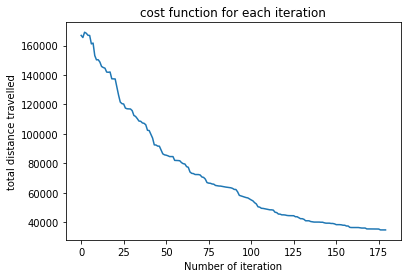


 
 
 for cooling rate=0.86 and for initial temprature 10000
Best solution: ['8', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '20', '47', '21', '32', '24', '10', '45', '35', '4', '26', '2', '29', '42', '5', '48', '39', '25', '14', '13', '23', '11', '12', '15', '9', '40', '3', '34', '41', '16', '22', '1']
Best distance: 35514.0


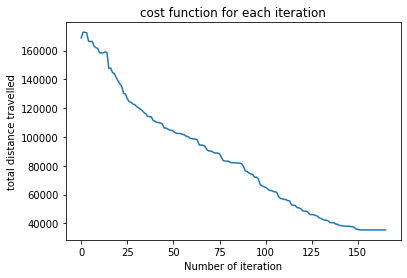


 
 
 for cooling rate=0.87 and for initial temprature 0.5
Best solution: ['38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '15', '33', '20', '47', '21', '39', '32', '24', '10', '45', '35', '4', '26', '2', '42', '48', '5', '29', '34', '41', '16', '22', '3', '23', '14', '25', '13', '11', '12', '40', '1', '8', '9']
Best distance: 34634.0


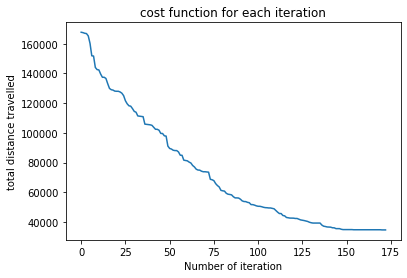


 
 
 for cooling rate=0.87 and for initial temprature 0.8
Best solution: ['9', '8', '1', '16', '22', '3', '41', '34', '14', '13', '25', '48', '5', '29', '2', '26', '4', '35', '45', '10', '42', '24', '32', '39', '21', '47', '11', '23', '40', '15', '12', '20', '33', '46', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '44', '31', '38']
Best distance: 34793.0


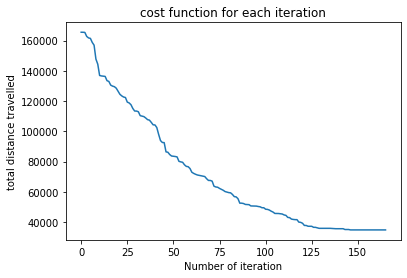


 
 
 for cooling rate=0.87 and for initial temprature 1
Best solution: ['32', '24', '10', '45', '35', '4', '26', '2', '29', '42', '5', '48', '39', '25', '14', '13', '11', '12', '33', '15', '40', '23', '34', '41', '3', '22', '16', '1', '8', '9', '38', '31', '46', '44', '18', '7', '36', '28', '30', '6', '37', '19', '27', '17', '43', '20', '47', '21']
Best distance: 36924.0


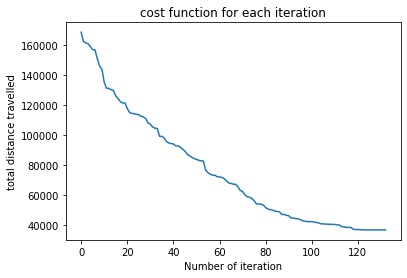


 
 
 for cooling rate=0.87 and for initial temprature 100
Best solution: ['7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '15', '12', '11', '20', '47', '21', '32', '24', '42', '10', '45', '35', '4', '26', '2', '29', '5', '48', '39', '25', '13', '23', '14', '34', '41', '3', '16', '22', '40', '1', '8', '9', '38', '31', '44', '18']
Best distance: 35297.0


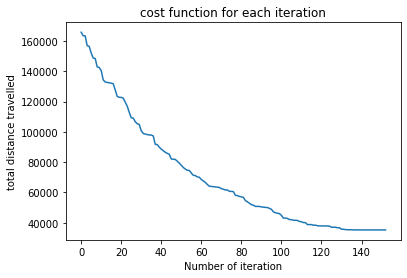


 
 
 for cooling rate=0.87 and for initial temprature 500
Best solution: ['39', '42', '5', '48', '25', '14', '23', '11', '13', '21', '47', '20', '33', '12', '40', '15', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '16', '22', '3', '34', '41', '29', '2', '26', '4', '35', '45', '10', '24', '32']
Best distance: 35744.0


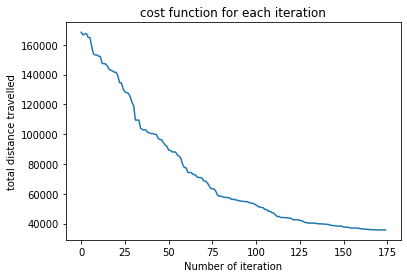


 
 
 for cooling rate=0.87 and for initial temprature 1000
Best solution: ['18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '15', '12', '33', '20', '11', '47', '21', '13', '14', '25', '39', '32', '48', '5', '24', '10', '45', '35', '4', '26', '42', '2', '29', '41', '34', '23', '40', '3', '22', '16', '1', '8', '9', '38', '31', '44']
Best distance: 35962.0


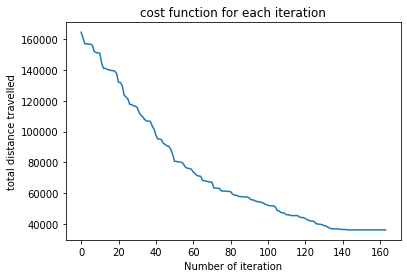


 
 
 for cooling rate=0.87 and for initial temprature 2000
Best solution: ['8', '9', '40', '11', '23', '3', '1', '22', '16', '41', '34', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '32', '39', '25', '14', '13', '21', '47', '20', '12', '15', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38']
Best distance: 34926.0


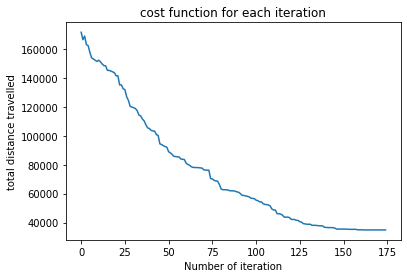


 
 
 for cooling rate=0.87 and for initial temprature 3000
Best solution: ['30', '36', '46', '33', '20', '12', '11', '47', '21', '13', '14', '23', '25', '39', '32', '24', '10', '45', '35', '4', '26', '42', '48', '5', '29', '2', '41', '34', '3', '22', '16', '8', '1', '40', '15', '9', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43']
Best distance: 35608.0


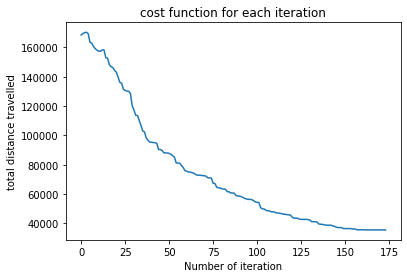


 
 
 for cooling rate=0.87 and for initial temprature 4000
Best solution: ['19', '27', '17', '43', '30', '36', '46', '33', '20', '47', '13', '21', '32', '39', '48', '42', '24', '10', '45', '35', '4', '26', '2', '29', '5', '25', '14', '34', '41', '16', '22', '1', '3', '23', '11', '12', '15', '40', '9', '8', '38', '31', '44', '18', '7', '28', '6', '37']
Best distance: 35220.0


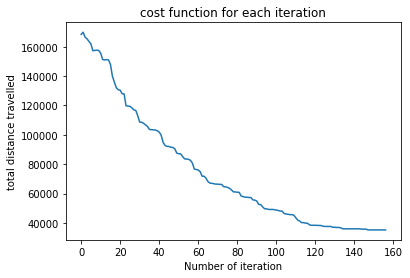


 
 
 for cooling rate=0.87 and for initial temprature 5000
Best solution: ['8', '9', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '20', '47', '11', '23', '34', '14', '25', '13', '21', '32', '39', '48', '5', '24', '10', '45', '35', '4', '26', '42', '2', '29', '41', '16', '22', '3', '40', '12', '15', '1']
Best distance: 35555.0


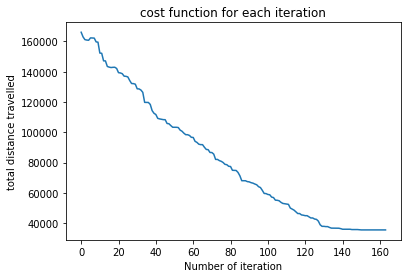


 
 
 for cooling rate=0.87 and for initial temprature 10000
Best solution: ['35', '4', '26', '10', '42', '2', '29', '34', '41', '16', '22', '1', '3', '23', '11', '12', '33', '46', '15', '40', '9', '8', '38', '31', '44', '18', '7', '36', '28', '6', '37', '19', '27', '17', '43', '30', '20', '47', '21', '13', '14', '25', '5', '48', '39', '32', '24', '45']
Best distance: 35688.0


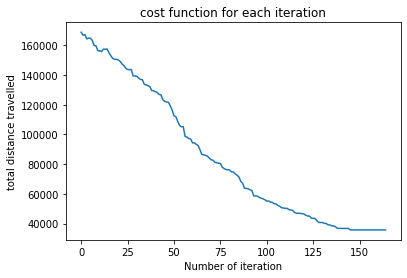


 
 
 for cooling rate=0.88 and for initial temprature 0.5
Best solution: ['8', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '15', '12', '33', '20', '47', '21', '13', '25', '5', '48', '39', '32', '24', '42', '10', '45', '35', '4', '26', '2', '29', '41', '16', '22', '3', '34', '14', '23', '11', '40', '9', '1']
Best distance: 34997.0


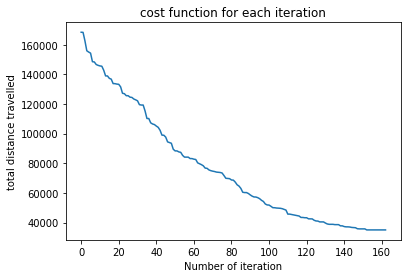


 
 
 for cooling rate=0.88 and for initial temprature 0.8
Best solution: ['6', '37', '19', '27', '17', '43', '20', '33', '46', '15', '40', '12', '11', '47', '13', '21', '32', '24', '42', '10', '45', '35', '4', '26', '2', '29', '5', '48', '39', '25', '14', '23', '34', '41', '3', '22', '16', '1', '8', '9', '38', '31', '44', '18', '7', '36', '28', '30']
Best distance: 35591.0


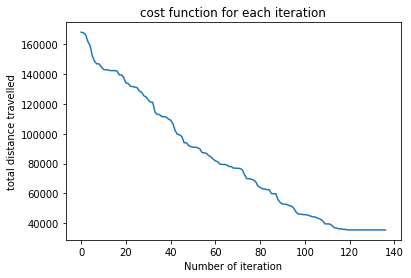


 
 
 for cooling rate=0.88 and for initial temprature 1
Best solution: ['46', '33', '20', '15', '40', '12', '11', '47', '21', '32', '39', '25', '14', '13', '23', '3', '34', '5', '48', '24', '10', '45', '35', '4', '26', '42', '2', '29', '41', '16', '22', '1', '8', '9', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36']
Best distance: 35665.0


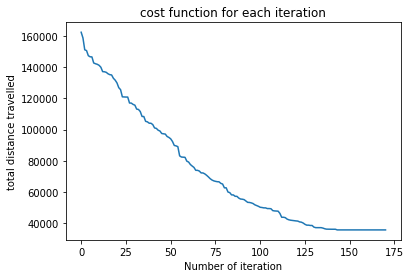


 
 
 for cooling rate=0.88 and for initial temprature 100
Best solution: ['10', '45', '35', '4', '26', '2', '29', '41', '34', '3', '14', '23', '11', '12', '15', '40', '22', '16', '1', '8', '9', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '20', '47', '21', '13', '25', '39', '32', '48', '5', '42', '24']
Best distance: 34701.0


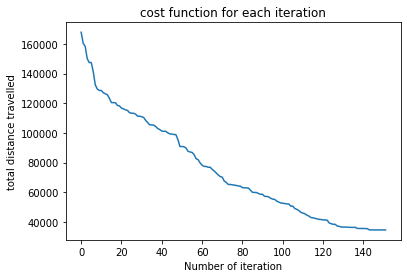


 
 
 for cooling rate=0.88 and for initial temprature 500
Best solution: ['7', '18', '44', '31', '38', '9', '8', '1', '16', '22', '3', '34', '41', '29', '2', '42', '10', '26', '4', '35', '45', '24', '32', '39', '48', '5', '25', '14', '23', '40', '15', '12', '11', '13', '21', '47', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28']
Best distance: 34980.0


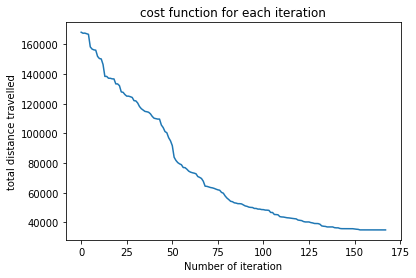


 
 
 for cooling rate=0.88 and for initial temprature 1000
Best solution: ['40', '1', '8', '9', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '15', '33', '20', '47', '13', '21', '32', '24', '10', '45', '35', '4', '26', '42', '2', '29', '5', '48', '39', '25', '14', '34', '41', '16', '22', '3', '23', '11', '12']
Best distance: 34433.0


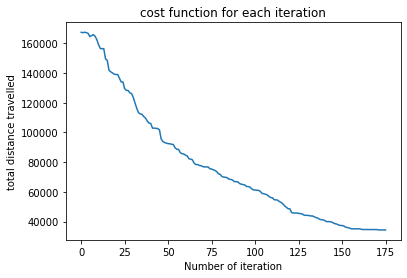


 
 
 for cooling rate=0.88 and for initial temprature 2000
Best solution: ['44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '15', '12', '20', '47', '21', '13', '14', '25', '39', '32', '24', '42', '10', '45', '35', '4', '26', '2', '29', '5', '48', '34', '41', '16', '22', '3', '23', '11', '40', '1', '8', '9', '38', '31']
Best distance: 34290.0


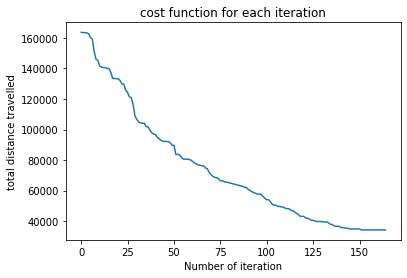


 
 
 for cooling rate=0.88 and for initial temprature 3000
Best solution: ['31', '38', '40', '9', '8', '1', '16', '22', '3', '34', '41', '29', '5', '42', '2', '26', '4', '35', '45', '10', '24', '32', '39', '48', '25', '14', '23', '11', '13', '21', '47', '20', '12', '15', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44']
Best distance: 35835.0


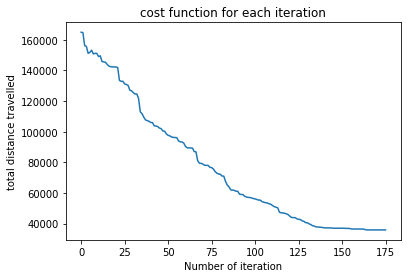


 
 
 for cooling rate=0.88 and for initial temprature 4000
Best solution: ['46', '15', '12', '11', '23', '14', '25', '13', '47', '21', '32', '39', '48', '42', '24', '10', '45', '35', '4', '26', '2', '29', '5', '34', '41', '16', '22', '3', '40', '9', '1', '8', '38', '31', '44', '18', '7', '36', '28', '6', '37', '19', '27', '17', '43', '30', '20', '33']
Best distance: 34666.0


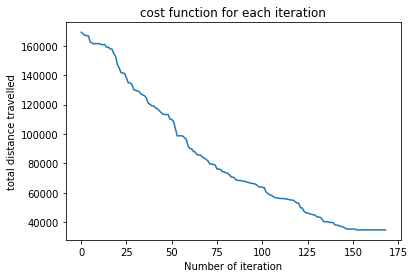


 
 
 for cooling rate=0.88 and for initial temprature 5000
Best solution: ['27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '40', '15', '12', '11', '23', '3', '22', '16', '41', '34', '14', '25', '48', '5', '29', '2', '26', '4', '35', '45', '10', '42', '24', '32', '39', '21', '13', '47', '20', '33', '46', '36', '30', '43', '17']
Best distance: 33957.0


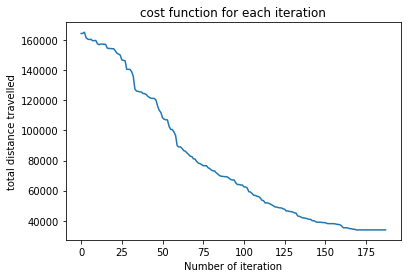


 
 
 for cooling rate=0.88 and for initial temprature 10000
Best solution: ['7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '15', '12', '11', '20', '47', '13', '21', '32', '39', '48', '42', '24', '10', '45', '35', '4', '26', '2', '29', '5', '25', '14', '23', '34', '41', '3', '22', '16', '8', '1', '40', '9', '38', '31', '44', '18']
Best distance: 35624.0


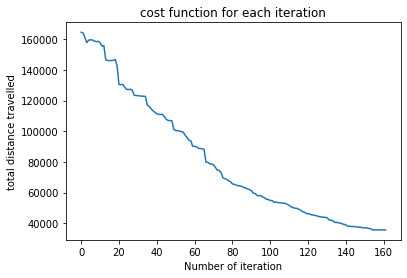


 
 
 for cooling rate=0.89 and for initial temprature 0.5
Best solution: ['15', '12', '11', '23', '3', '34', '41', '29', '2', '42', '26', '4', '35', '45', '10', '24', '5', '48', '32', '39', '25', '14', '13', '21', '47', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '16', '22', '40']
Best distance: 34875.0


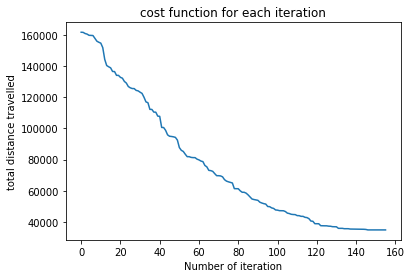


 
 
 for cooling rate=0.89 and for initial temprature 0.8
Best solution: ['1', '16', '22', '3', '40', '15', '12', '11', '23', '34', '41', '2', '29', '5', '42', '10', '26', '4', '35', '45', '24', '32', '39', '48', '25', '14', '13', '21', '47', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8']
Best distance: 35860.0


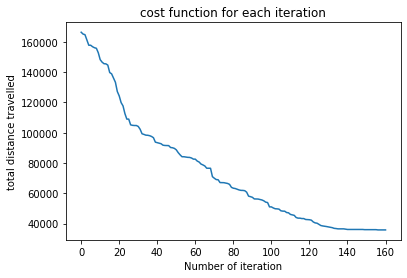


 
 
 for cooling rate=0.89 and for initial temprature 1
Best solution: ['20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '15', '12', '40', '9', '8', '1', '16', '22', '3', '34', '41', '29', '2', '26', '4', '35', '45', '10', '42', '5', '48', '24', '32', '39', '21', '13', '25', '14', '23', '11', '47']
Best distance: 35336.0


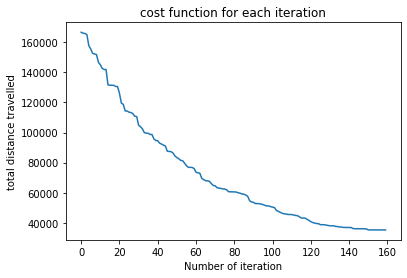


 
 
 for cooling rate=0.89 and for initial temprature 100
Best solution: ['1', '8', '16', '41', '34', '14', '48', '5', '29', '2', '42', '10', '26', '4', '35', '45', '24', '32', '39', '25', '13', '21', '47', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '40', '15', '12', '11', '23', '3', '22']
Best distance: 34785.0


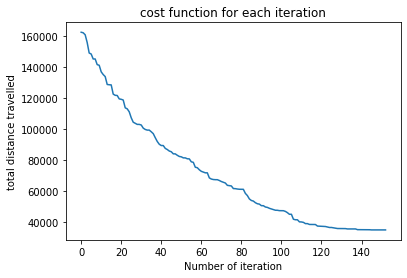


 
 
 for cooling rate=0.89 and for initial temprature 500
Best solution: ['16', '22', '3', '23', '13', '25', '14', '34', '41', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '39', '32', '21', '47', '11', '12', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '15', '40', '9', '38', '8', '1']
Best distance: 34886.0


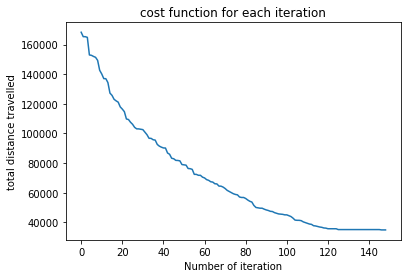


 
 
 for cooling rate=0.89 and for initial temprature 1000
Best solution: ['47', '13', '25', '14', '23', '11', '12', '15', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '40', '1', '8', '16', '22', '3', '34', '41', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '39', '32', '21']
Best distance: 34285.0


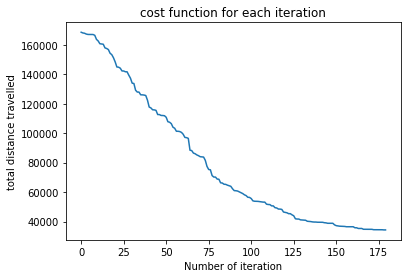


 
 
 for cooling rate=0.89 and for initial temprature 2000
Best solution: ['39', '48', '42', '24', '10', '45', '35', '4', '26', '2', '29', '5', '41', '16', '22', '3', '34', '23', '14', '25', '13', '11', '12', '15', '40', '9', '1', '8', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '20', '47', '21', '32']
Best distance: 35215.0


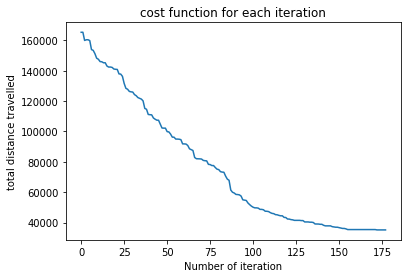


 
 
 for cooling rate=0.89 and for initial temprature 3000
Best solution: ['11', '12', '20', '33', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '46', '15', '40', '9', '38', '8', '1', '16', '22', '3', '34', '41', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '32', '39', '25', '14', '13', '21', '47', '23']
Best distance: 35105.0


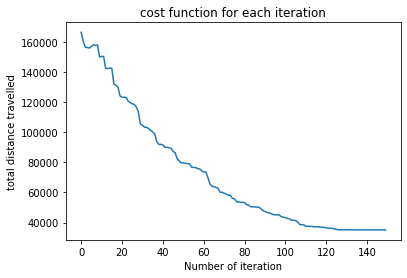


 
 
 for cooling rate=0.89 and for initial temprature 4000
Best solution: ['20', '43', '17', '27', '19', '37', '6', '30', '28', '36', '7', '18', '44', '31', '38', '46', '33', '12', '15', '40', '9', '8', '1', '16', '22', '3', '41', '34', '48', '5', '29', '2', '42', '26', '4', '35', '45', '10', '24', '32', '39', '25', '14', '23', '11', '13', '21', '47']
Best distance: 34961.0


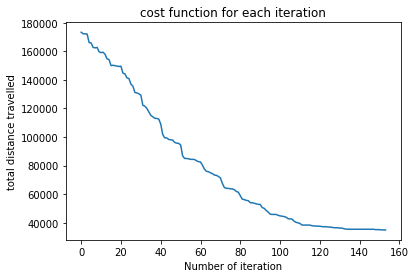


 
 
 for cooling rate=0.89 and for initial temprature 5000
Best solution: ['16', '22', '3', '41', '34', '14', '25', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '39', '32', '21', '13', '47', '20', '33', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '46', '15', '12', '11', '23', '40', '9', '38', '8', '1']
Best distance: 35632.0


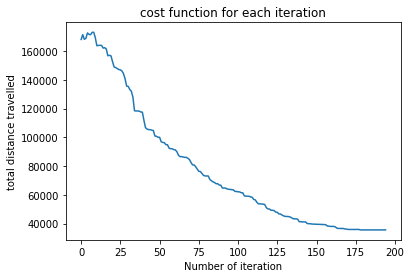


 
 
 for cooling rate=0.89 and for initial temprature 10000
Best solution: ['39', '21', '47', '11', '13', '25', '14', '23', '3', '40', '15', '12', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '22', '16', '41', '34', '48', '5', '29', '2', '26', '4', '35', '45', '10', '42', '24', '32']
Best distance: 34469.0


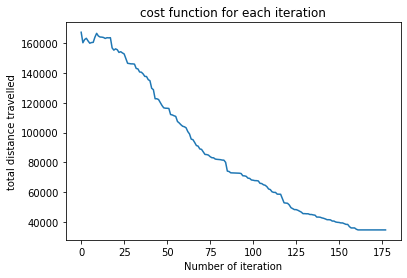


 
 
 for cooling rate=0.9 and for initial temprature 0.5
Best solution: ['2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '39', '32', '21', '13', '47', '11', '12', '20', '43', '17', '27', '19', '37', '6', '30', '28', '36', '7', '18', '44', '31', '38', '9', '46', '33', '15', '40', '1', '8', '16', '22', '3', '41', '34', '23', '14', '25', '29']
Best distance: 36372.0


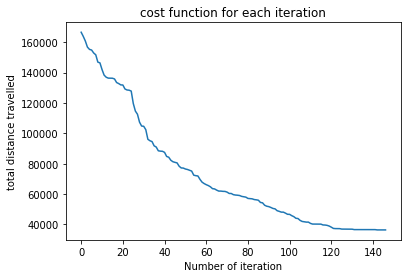


 
 
 for cooling rate=0.9 and for initial temprature 0.8
Best solution: ['3', '23', '11', '12', '15', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '20', '47', '21', '13', '25', '39', '32', '24', '45', '35', '4', '26', '10', '42', '2', '29', '5', '48', '14', '34', '41', '16', '22', '1', '8', '38', '9', '40']
Best distance: 35355.0


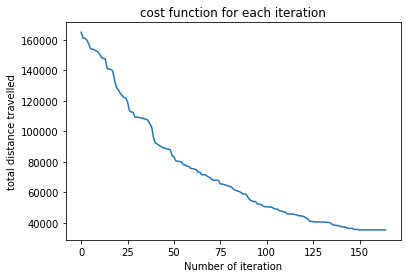


 
 
 for cooling rate=0.9 and for initial temprature 1
Best solution: ['18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '20', '47', '21', '32', '24', '10', '45', '35', '4', '26', '2', '29', '42', '5', '48', '39', '25', '14', '13', '23', '3', '34', '41', '16', '22', '40', '11', '12', '15', '1', '8', '9', '38', '31', '44']
Best distance: 36051.0


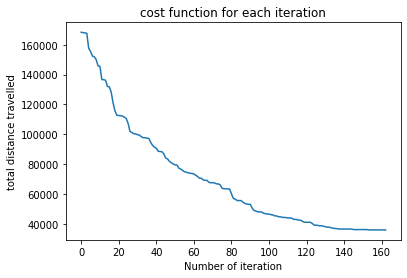


 
 
 for cooling rate=0.9 and for initial temprature 100
Best solution: ['17', '43', '30', '36', '20', '11', '47', '21', '13', '14', '25', '5', '42', '48', '39', '32', '24', '10', '45', '35', '4', '26', '2', '29', '41', '34', '23', '3', '22', '16', '1', '8', '38', '9', '40', '15', '12', '33', '46', '31', '44', '18', '7', '28', '6', '37', '19', '27']
Best distance: 36858.0


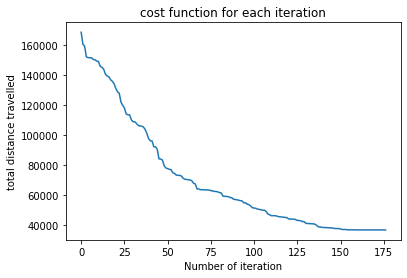


 
 
 for cooling rate=0.9 and for initial temprature 500
Best solution: ['30', '20', '47', '21', '13', '14', '25', '39', '32', '24', '45', '35', '4', '26', '10', '42', '48', '5', '2', '29', '34', '41', '16', '22', '1', '8', '38', '9', '40', '3', '23', '11', '12', '15', '33', '46', '31', '44', '18', '7', '36', '28', '6', '37', '19', '27', '17', '43']
Best distance: 35400.0


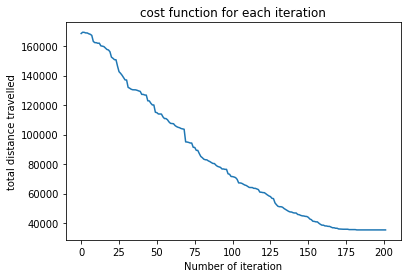


 
 
 for cooling rate=0.9 and for initial temprature 1000
Best solution: ['9', '40', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '15', '33', '20', '12', '11', '23', '13', '47', '21', '25', '14', '34', '48', '39', '32', '24', '45', '35', '4', '26', '10', '42', '5', '29', '2', '41', '3', '22', '16', '1', '8']
Best distance: 37123.0


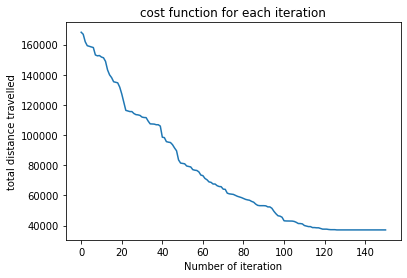


 
 
 for cooling rate=0.9 and for initial temprature 2000
Best solution: ['7', '36', '28', '6', '37', '19', '27', '17', '43', '30', '20', '47', '33', '46', '15', '40', '12', '11', '23', '25', '13', '21', '32', '39', '48', '5', '24', '45', '35', '4', '26', '10', '42', '2', '29', '14', '3', '34', '41', '16', '22', '1', '8', '9', '38', '31', '44', '18']
Best distance: 36822.0


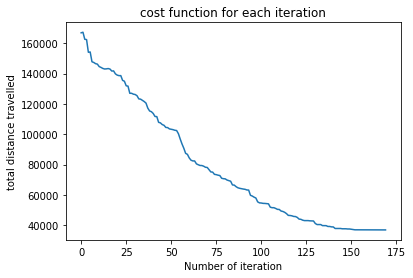


 
 
 for cooling rate=0.9 and for initial temprature 3000
Best solution: ['37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '16', '22', '40', '15', '12', '11', '23', '3', '41', '34', '14', '25', '39', '48', '5', '29', '2', '26', '4', '35', '45', '10', '42', '24', '32', '21', '13', '47', '20', '33', '46', '36', '30', '43', '17', '27', '19']
Best distance: 34876.0


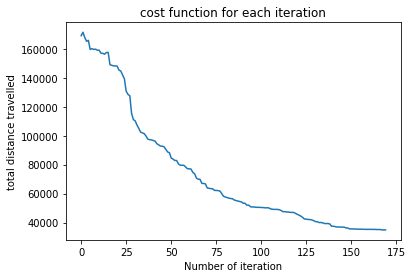


 
 
 for cooling rate=0.9 and for initial temprature 4000
Best solution: ['5', '34', '14', '23', '13', '25', '39', '32', '21', '47', '20', '12', '11', '40', '9', '15', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '8', '1', '16', '22', '3', '41', '29', '2', '42', '26', '4', '35', '45', '10', '24', '48']
Best distance: 36394.0


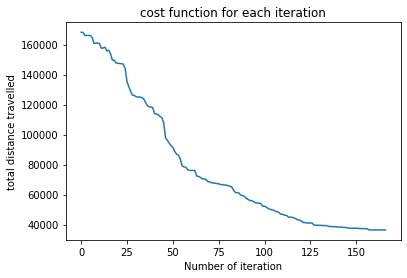


 
 
 for cooling rate=0.9 and for initial temprature 5000
Best solution: ['6', '28', '7', '18', '44', '31', '15', '40', '9', '38', '8', '1', '22', '16', '41', '34', '3', '23', '14', '5', '29', '2', '26', '4', '35', '45', '10', '24', '42', '48', '32', '39', '25', '13', '21', '47', '11', '12', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37']
Best distance: 35890.0


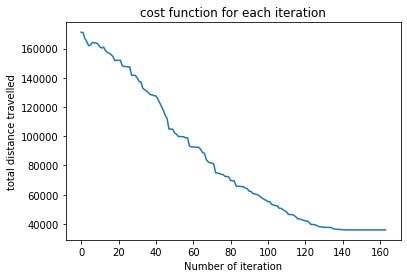


 
 
 for cooling rate=0.9 and for initial temprature 10000
Best solution: ['2', '29', '42', '5', '48', '25', '14', '23', '3', '34', '41', '16', '22', '1', '8', '9', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '15', '40', '11', '12', '20', '47', '13', '21', '39', '32', '24', '10', '45', '35', '4', '26']
Best distance: 34966.0


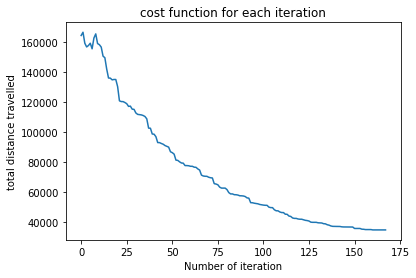


 
 
 for cooling rate=0.91 and for initial temprature 0.5
Best solution: ['30', '36', '46', '15', '33', '20', '47', '12', '11', '23', '13', '21', '32', '24', '10', '45', '35', '4', '26', '2', '29', '42', '5', '48', '39', '25', '14', '34', '41', '16', '22', '3', '40', '1', '8', '9', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43']
Best distance: 35346.0


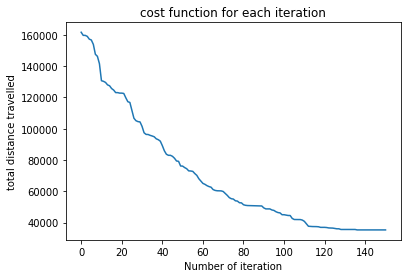


 
 
 for cooling rate=0.91 and for initial temprature 0.8
Best solution: ['39', '48', '5', '42', '24', '10', '45', '35', '4', '26', '2', '29', '41', '34', '3', '22', '16', '1', '8', '9', '40', '12', '15', '46', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '33', '20', '47', '11', '23', '14', '25', '13', '21', '32']
Best distance: 34441.0


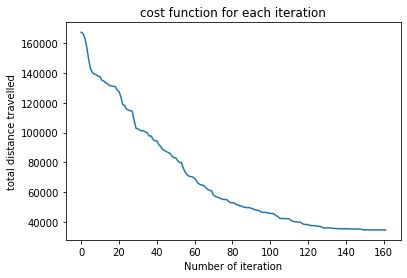


 
 
 for cooling rate=0.91 and for initial temprature 1
Best solution: ['34', '14', '23', '11', '13', '25', '48', '5', '29', '2', '42', '10', '26', '4', '35', '45', '24', '32', '39', '21', '47', '20', '12', '15', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '40', '22', '16', '3', '41']
Best distance: 34691.0


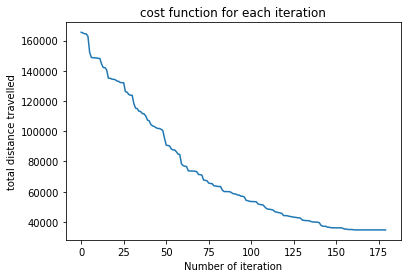


 
 
 for cooling rate=0.91 and for initial temprature 100
Best solution: ['5', '29', '2', '26', '4', '35', '45', '10', '42', '24', '32', '39', '25', '14', '13', '23', '11', '40', '15', '12', '47', '21', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '16', '22', '3', '41', '34', '48']
Best distance: 35324.0


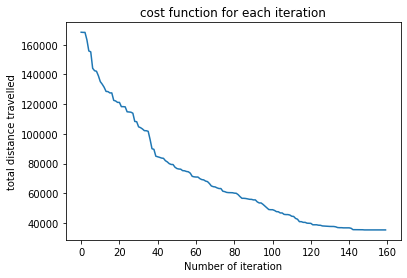


 
 
 for cooling rate=0.91 and for initial temprature 500
Best solution: ['47', '20', '12', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '15', '40', '9', '8', '1', '22', '16', '41', '34', '29', '2', '42', '26', '4', '35', '45', '10', '24', '48', '5', '25', '39', '32', '21', '13', '14', '3', '23', '11']
Best distance: 35930.0


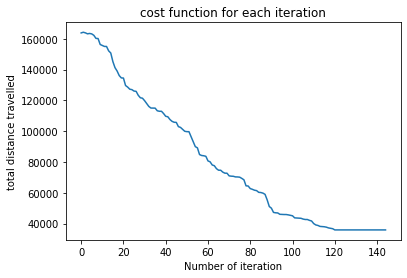


 
 
 for cooling rate=0.91 and for initial temprature 1000
Best solution: ['30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '16', '22', '3', '41', '34', '23', '14', '48', '5', '29', '2', '42', '26', '4', '35', '45', '10', '24', '32', '39', '25', '13', '21', '47', '11', '40', '15', '12', '20', '33', '46', '36']
Best distance: 34817.0


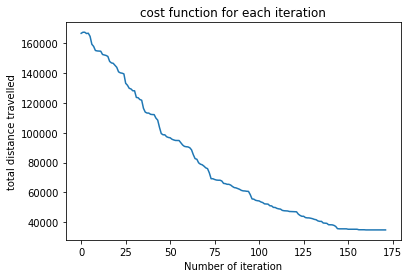


 
 
 for cooling rate=0.91 and for initial temprature 2000
Best solution: ['19', '27', '17', '43', '30', '36', '46', '33', '20', '47', '12', '15', '11', '23', '13', '25', '14', '34', '5', '48', '39', '21', '32', '24', '45', '35', '4', '26', '10', '42', '2', '29', '41', '16', '22', '3', '40', '1', '8', '9', '38', '31', '44', '18', '7', '28', '6', '37']
Best distance: 36346.0


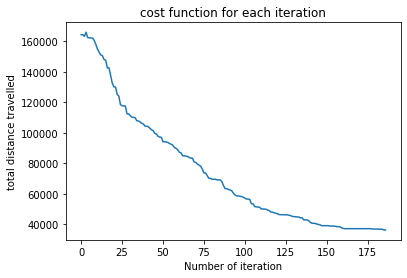


 
 
 for cooling rate=0.91 and for initial temprature 3000
Best solution: ['28', '7', '18', '44', '31', '38', '9', '40', '1', '8', '16', '22', '3', '34', '41', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '39', '32', '21', '47', '13', '25', '14', '23', '11', '12', '15', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6']
Best distance: 34285.0


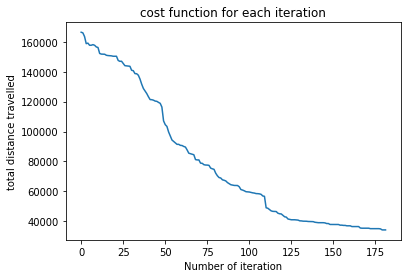


 
 
 for cooling rate=0.91 and for initial temprature 4000
Best solution: ['46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '40', '12', '11', '13', '25', '14', '23', '3', '22', '16', '41', '34', '48', '5', '29', '2', '42', '10', '26', '4', '35', '45', '24', '32', '39', '21', '47', '20', '33', '15']
Best distance: 34579.0


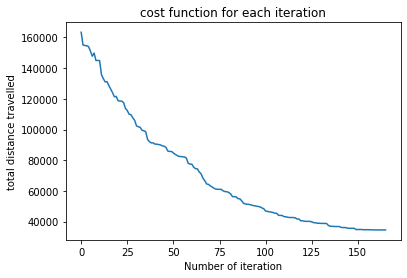


 
 
 for cooling rate=0.91 and for initial temprature 5000
Best solution: ['41', '34', '48', '5', '29', '2', '26', '4', '35', '45', '10', '42', '24', '32', '39', '21', '25', '14', '13', '47', '20', '12', '15', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '40', '11', '23', '3', '22', '16']
Best distance: 34836.0


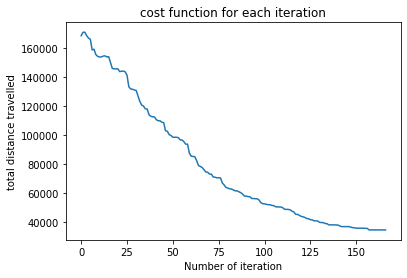


 
 
 for cooling rate=0.91 and for initial temprature 10000
Best solution: ['38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '15', '12', '20', '47', '11', '13', '21', '39', '32', '24', '42', '10', '45', '35', '4', '26', '2', '29', '5', '48', '25', '14', '23', '34', '41', '3', '16', '22', '40', '9', '1', '8']
Best distance: 35123.0


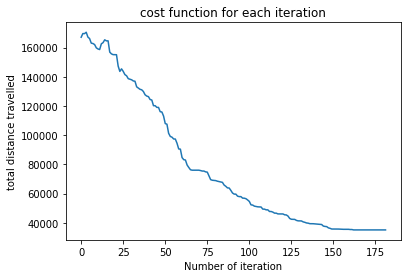


 
 
 for cooling rate=0.92 and for initial temprature 0.5
Best solution: ['7', '36', '28', '6', '37', '19', '27', '17', '43', '30', '20', '12', '47', '13', '21', '39', '32', '24', '10', '45', '35', '4', '26', '42', '2', '29', '5', '48', '25', '14', '11', '23', '34', '41', '3', '22', '16', '8', '1', '40', '15', '33', '46', '9', '38', '31', '44', '18']
Best distance: 36314.0


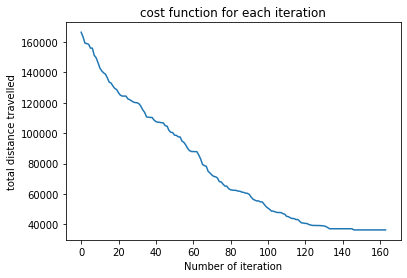


 
 
 for cooling rate=0.92 and for initial temprature 0.8
Best solution: ['40', '11', '12', '15', '33', '46', '44', '18', '7', '36', '28', '6', '37', '19', '27', '17', '43', '30', '20', '47', '21', '13', '23', '25', '39', '32', '24', '10', '45', '35', '4', '26', '2', '29', '42', '48', '5', '14', '34', '41', '3', '22', '16', '1', '8', '9', '38', '31']
Best distance: 37134.0


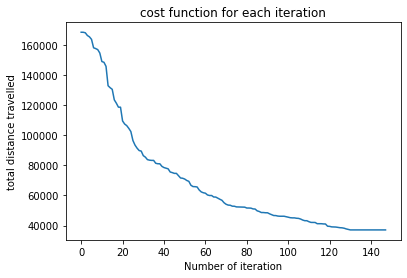


 
 
 for cooling rate=0.92 and for initial temprature 1
Best solution: ['46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '16', '22', '3', '14', '25', '39', '48', '5', '34', '41', '29', '2', '42', '26', '4', '35', '45', '10', '24', '32', '21', '13', '47', '11', '23', '40', '15', '12', '20', '33']
Best distance: 36070.0


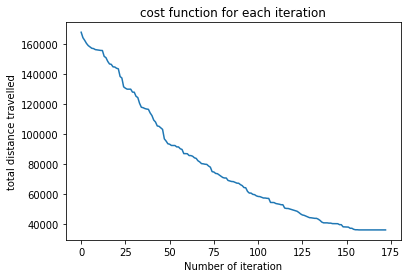


 
 
 for cooling rate=0.92 and for initial temprature 100
Best solution: ['33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '40', '15', '12', '11', '23', '14', '3', '22', '16', '41', '34', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '32', '39', '25', '13', '21', '47', '20']
Best distance: 34012.0


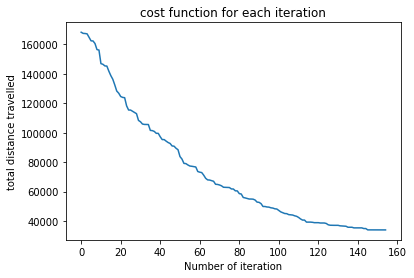


 
 
 for cooling rate=0.92 and for initial temprature 500
Best solution: ['12', '11', '47', '21', '13', '23', '14', '25', '39', '32', '24', '45', '35', '4', '26', '10', '42', '48', '5', '2', '29', '34', '41', '16', '22', '3', '40', '15', '33', '46', '9', '1', '8', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '20']
Best distance: 35484.0


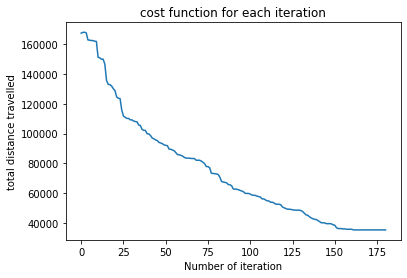


 
 
 for cooling rate=0.92 and for initial temprature 1000
Best solution: ['18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '20', '47', '21', '32', '24', '45', '35', '4', '26', '10', '42', '2', '29', '5', '48', '39', '25', '13', '23', '14', '34', '41', '3', '22', '16', '1', '8', '9', '40', '11', '12', '15', '38', '31', '44']
Best distance: 35336.0


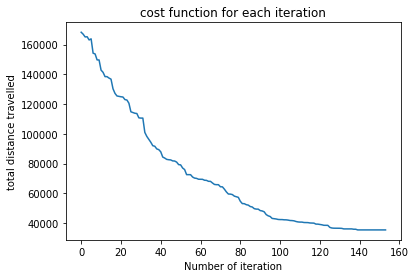


 
 
 for cooling rate=0.92 and for initial temprature 2000
Best solution: ['6', '37', '19', '27', '17', '43', '30', '36', '44', '31', '38', '9', '8', '1', '16', '22', '3', '41', '34', '48', '5', '29', '2', '42', '26', '4', '35', '45', '10', '24', '32', '39', '21', '13', '25', '14', '23', '11', '47', '20', '12', '40', '15', '33', '46', '18', '7', '28']
Best distance: 34512.0


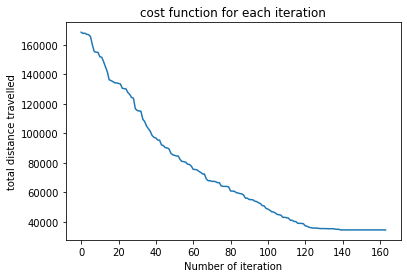


 
 
 for cooling rate=0.92 and for initial temprature 3000
Best solution: ['18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '15', '40', '23', '11', '12', '33', '20', '47', '13', '14', '25', '21', '32', '39', '48', '5', '42', '24', '10', '45', '35', '4', '26', '2', '29', '41', '34', '3', '22', '16', '1', '8', '9', '38', '31', '44']
Best distance: 34737.0


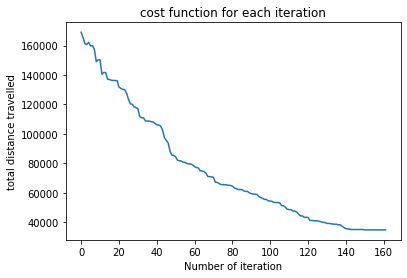


 
 
 for cooling rate=0.92 and for initial temprature 4000
Best solution: ['18', '44', '31', '38', '9', '8', '1', '40', '15', '12', '11', '23', '3', '22', '16', '41', '34', '5', '29', '2', '26', '4', '35', '45', '10', '24', '42', '48', '39', '32', '21', '25', '14', '13', '47', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7']
Best distance: 34614.0


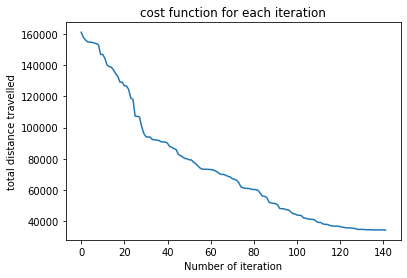


 
 
 for cooling rate=0.92 and for initial temprature 5000
Best solution: ['8', '16', '22', '3', '41', '34', '14', '23', '11', '13', '25', '48', '5', '42', '29', '2', '26', '4', '35', '45', '10', '24', '32', '39', '21', '47', '20', '12', '15', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '40', '1']
Best distance: 35142.0


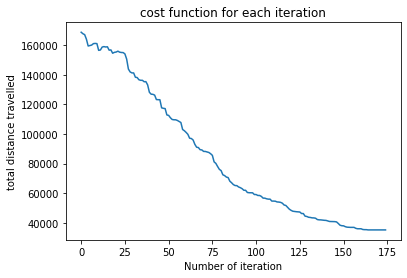


 
 
 for cooling rate=0.92 and for initial temprature 10000
Best solution: ['24', '32', '39', '48', '5', '34', '23', '14', '25', '13', '21', '47', '11', '12', '20', '33', '46', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '44', '31', '38', '15', '40', '9', '8', '1', '16', '22', '3', '41', '29', '2', '42', '26', '4', '35', '45', '10']
Best distance: 35838.0


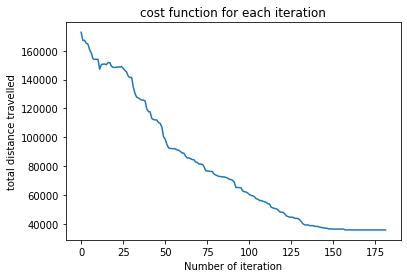


 
 
 for cooling rate=0.93 and for initial temprature 0.5
Best solution: ['17', '43', '30', '20', '33', '15', '12', '11', '47', '21', '32', '24', '10', '45', '35', '4', '26', '42', '2', '29', '5', '48', '39', '25', '13', '14', '34', '41', '16', '22', '3', '23', '40', '1', '8', '9', '38', '31', '46', '44', '18', '7', '36', '28', '6', '37', '19', '27']
Best distance: 35567.0


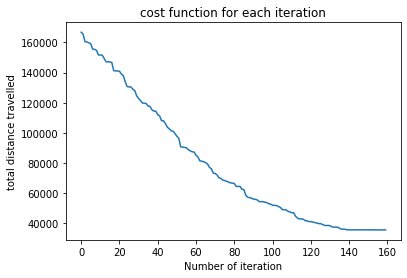


 
 
 for cooling rate=0.93 and for initial temprature 0.8
Best solution: ['3', '23', '11', '12', '40', '1', '8', '9', '15', '33', '46', '38', '31', '44', '18', '7', '36', '28', '6', '37', '19', '27', '17', '43', '30', '20', '47', '13', '21', '32', '24', '45', '35', '4', '26', '10', '42', '2', '29', '5', '48', '39', '25', '14', '34', '41', '16', '22']
Best distance: 35617.0


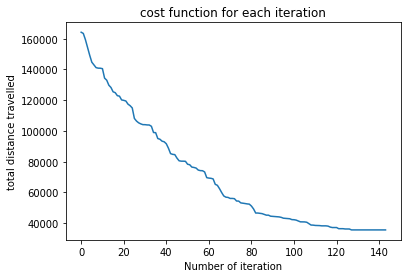


 
 
 for cooling rate=0.93 and for initial temprature 1
Best solution: ['17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '40', '9', '8', '1', '16', '22', '3', '41', '34', '48', '5', '29', '2', '42', '26', '4', '35', '45', '10', '24', '32', '39', '21', '13', '25', '14', '23', '11', '47', '20', '12', '15', '33', '46', '36', '30', '43']
Best distance: 34535.0


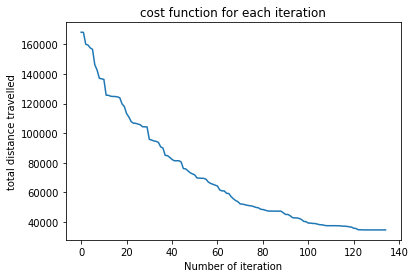


 
 
 for cooling rate=0.93 and for initial temprature 100
Best solution: ['36', '33', '20', '47', '11', '23', '13', '21', '25', '14', '34', '5', '48', '39', '32', '24', '45', '35', '4', '26', '10', '42', '2', '29', '41', '16', '22', '3', '40', '12', '15', '46', '9', '1', '8', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30']
Best distance: 36148.0


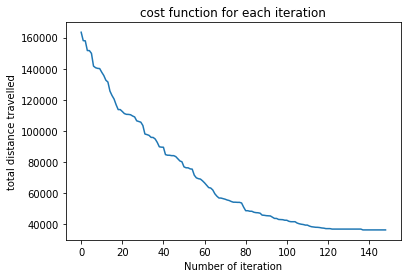


 
 
 for cooling rate=0.93 and for initial temprature 500
Best solution: ['43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '40', '22', '16', '3', '34', '41', '29', '2', '42', '10', '26', '4', '35', '45', '24', '5', '48', '39', '32', '21', '13', '25', '14', '23', '11', '47', '20', '33', '12', '15', '46', '36', '30']
Best distance: 34872.0


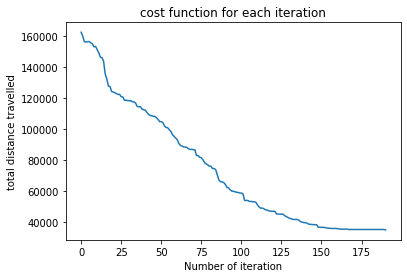


 
 
 for cooling rate=0.93 and for initial temprature 1000
Best solution: ['30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '40', '22', '16', '3', '41', '34', '14', '23', '13', '25', '39', '48', '5', '29', '2', '26', '4', '35', '45', '10', '42', '24', '32', '21', '47', '20', '11', '12', '15', '33', '46', '36']
Best distance: 35297.0


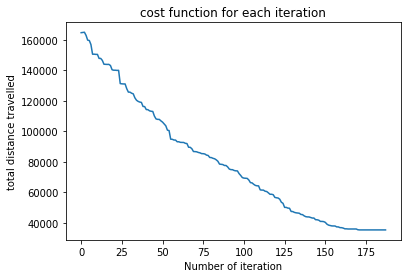


 
 
 for cooling rate=0.93 and for initial temprature 2000
Best solution: ['4', '35', '45', '10', '24', '32', '39', '21', '13', '47', '20', '30', '43', '17', '27', '19', '37', '6', '28', '36', '7', '18', '44', '31', '38', '46', '33', '15', '12', '11', '23', '40', '9', '8', '1', '16', '22', '3', '41', '34', '14', '25', '48', '5', '29', '2', '42', '26']
Best distance: 35175.0


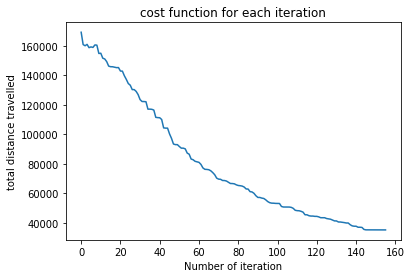


 
 
 for cooling rate=0.93 and for initial temprature 3000
Best solution: ['20', '47', '21', '13', '14', '25', '48', '39', '32', '24', '10', '45', '35', '4', '26', '2', '42', '5', '29', '41', '34', '23', '11', '12', '15', '40', '3', '22', '16', '1', '8', '9', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33']
Best distance: 35745.0


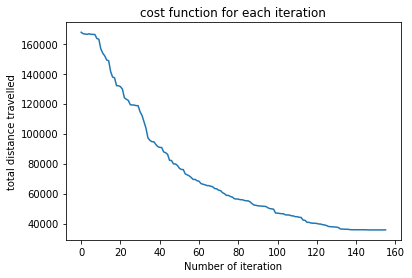


 
 
 for cooling rate=0.93 and for initial temprature 4000
Best solution: ['1', '16', '22', '3', '41', '34', '14', '13', '25', '5', '29', '2', '26', '4', '35', '45', '10', '24', '42', '48', '39', '32', '21', '47', '23', '11', '12', '20', '33', '15', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '40', '9', '8']
Best distance: 35631.0


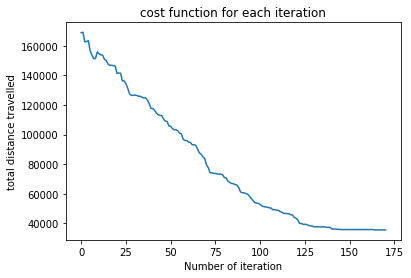


 
 
 for cooling rate=0.93 and for initial temprature 5000
Best solution: ['6', '37', '19', '27', '17', '43', '30', '36', '46', '15', '33', '20', '47', '21', '39', '32', '24', '48', '5', '29', '42', '10', '45', '35', '4', '26', '2', '41', '34', '14', '25', '13', '23', '11', '12', '40', '3', '22', '16', '1', '8', '9', '38', '31', '44', '18', '7', '28']
Best distance: 36090.0


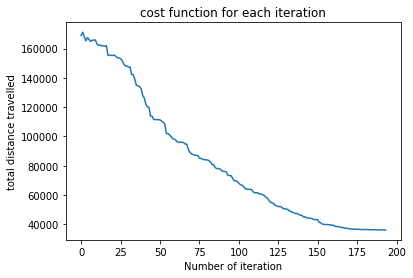


 
 
 for cooling rate=0.93 and for initial temprature 10000
Best solution: ['11', '12', '47', '20', '30', '43', '17', '27', '19', '37', '6', '28', '36', '7', '18', '44', '46', '33', '15', '40', '31', '38', '9', '8', '1', '16', '22', '3', '41', '29', '2', '42', '26', '4', '35', '45', '10', '24', '32', '39', '48', '5', '34', '14', '25', '21', '13', '23']
Best distance: 36877.0


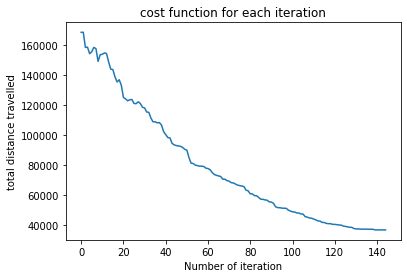


 
 
 for cooling rate=0.94 and for initial temprature 0.5
Best solution: ['3', '41', '34', '5', '48', '42', '29', '2', '26', '4', '35', '45', '10', '24', '32', '39', '25', '14', '23', '13', '21', '47', '20', '11', '12', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '15', '40', '1', '8', '16', '22']
Best distance: 35846.0


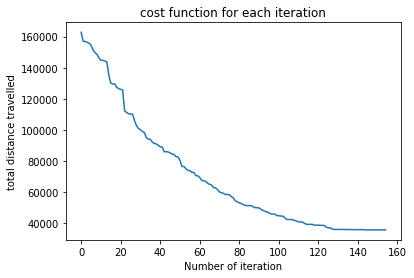


 
 
 for cooling rate=0.94 and for initial temprature 0.8
Best solution: ['16', '22', '3', '34', '14', '25', '48', '5', '41', '29', '2', '42', '26', '4', '35', '45', '10', '24', '32', '39', '21', '13', '23', '11', '47', '20', '12', '40', '15', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1']
Best distance: 36141.0


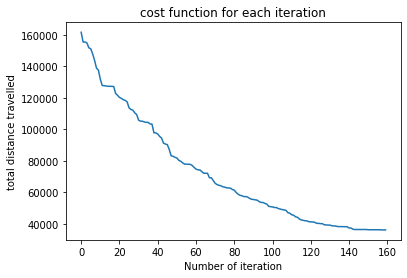


 
 
 for cooling rate=0.94 and for initial temprature 1
Best solution: ['39', '32', '24', '42', '10', '45', '35', '4', '26', '2', '29', '41', '3', '16', '22', '40', '1', '8', '9', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '20', '15', '12', '11', '23', '13', '47', '21', '25', '14', '34', '5', '48']
Best distance: 36024.0


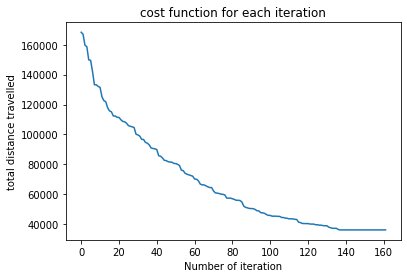


 
 
 for cooling rate=0.94 and for initial temprature 100
Best solution: ['36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '16', '22', '3', '40', '12', '11', '23', '14', '34', '41', '2', '29', '5', '48', '42', '10', '26', '4', '35', '45', '24', '32', '39', '21', '25', '13', '47', '20', '33', '15', '46']
Best distance: 35562.0


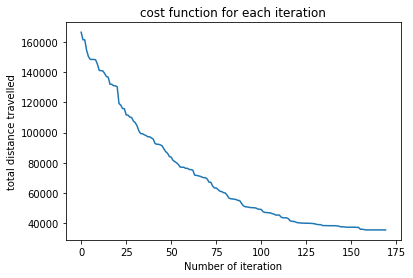


 
 
 for cooling rate=0.94 and for initial temprature 500
Best solution: ['47', '13', '25', '14', '23', '11', '12', '15', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '40', '3', '22', '16', '41', '34', '29', '2', '5', '48', '42', '10', '26', '4', '35', '45', '24', '32', '39', '21']
Best distance: 34738.0


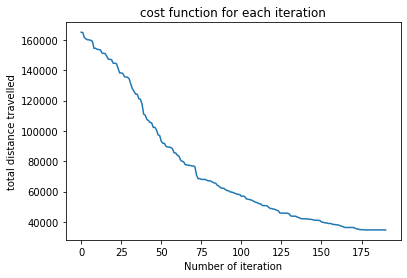


 
 
 for cooling rate=0.94 and for initial temprature 1000
Best solution: ['22', '16', '1', '8', '9', '40', '15', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '12', '20', '47', '11', '23', '13', '21', '39', '32', '24', '10', '45', '35', '4', '26', '42', '2', '29', '5', '48', '25', '14', '34', '41', '3']
Best distance: 34709.0


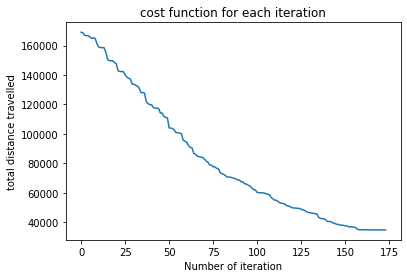


 
 
 for cooling rate=0.94 and for initial temprature 2000
Best solution: ['6', '28', '7', '18', '44', '31', '38', '8', '1', '22', '16', '41', '2', '29', '34', '3', '23', '13', '14', '25', '39', '48', '5', '42', '26', '4', '35', '45', '10', '24', '32', '21', '47', '11', '20', '33', '12', '15', '40', '9', '46', '36', '30', '43', '17', '27', '19', '37']
Best distance: 37156.0


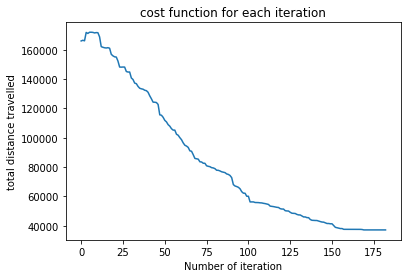


 
 
 for cooling rate=0.94 and for initial temprature 3000
Best solution: ['48', '32', '39', '25', '14', '23', '11', '13', '21', '47', '20', '12', '40', '15', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '16', '22', '3', '34', '41', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5']
Best distance: 34198.0


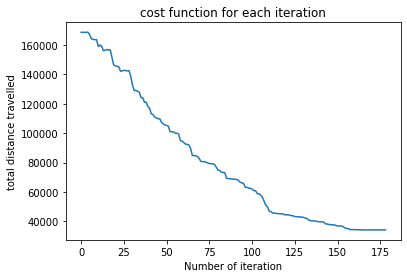


 
 
 for cooling rate=0.94 and for initial temprature 4000
Best solution: ['9', '38', '31', '44', '18', '7', '36', '28', '30', '6', '37', '19', '27', '17', '43', '20', '47', '13', '21', '39', '32', '24', '10', '45', '35', '4', '26', '42', '2', '29', '5', '48', '25', '14', '23', '11', '12', '33', '46', '15', '40', '3', '34', '41', '16', '22', '1', '8']
Best distance: 34604.0


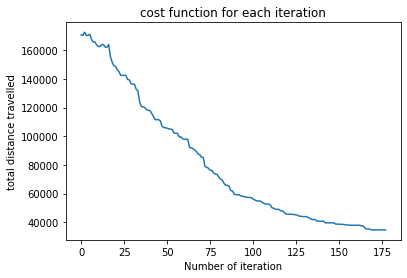


 
 
 for cooling rate=0.94 and for initial temprature 5000
Best solution: ['22', '1', '8', '9', '40', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '15', '12', '33', '20', '47', '11', '13', '21', '32', '24', '42', '10', '45', '35', '4', '26', '2', '29', '5', '48', '39', '25', '14', '23', '3', '34', '41', '16']
Best distance: 35050.0


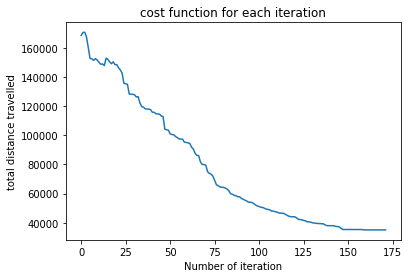


 
 
 for cooling rate=0.94 and for initial temprature 10000
Best solution: ['8', '9', '38', '31', '46', '44', '18', '7', '36', '28', '6', '37', '19', '27', '17', '43', '30', '20', '47', '21', '13', '11', '12', '33', '15', '40', '23', '14', '25', '39', '32', '48', '24', '45', '35', '4', '26', '10', '42', '2', '29', '5', '34', '41', '3', '22', '16', '1']
Best distance: 36723.0


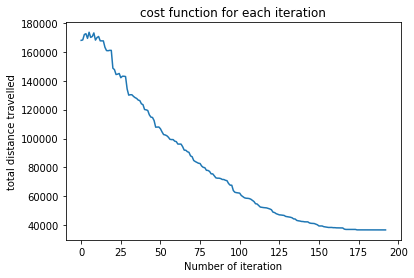


 
 
 for cooling rate=0.95 and for initial temprature 0.5
Best solution: ['38', '31', '44', '18', '7', '36', '28', '6', '37', '19', '27', '17', '43', '30', '20', '33', '46', '15', '40', '12', '11', '47', '21', '32', '24', '45', '35', '4', '26', '10', '42', '2', '29', '5', '48', '39', '25', '14', '13', '23', '3', '34', '41', '16', '22', '1', '8', '9']
Best distance: 34927.0


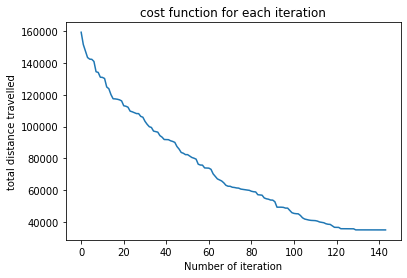


 
 
 for cooling rate=0.95 and for initial temprature 0.8
Best solution: ['47', '13', '21', '39', '32', '24', '10', '45', '35', '4', '26', '42', '2', '29', '5', '48', '25', '14', '11', '23', '34', '41', '3', '22', '16', '1', '8', '9', '40', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '15', '12', '20']
Best distance: 35207.0


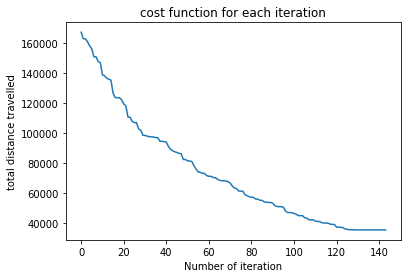


 
 
 for cooling rate=0.95 and for initial temprature 1
Best solution: ['15', '40', '3', '34', '14', '23', '11', '47', '13', '25', '21', '39', '32', '24', '10', '45', '35', '4', '26', '42', '48', '5', '29', '2', '41', '16', '22', '1', '8', '9', '38', '31', '46', '44', '18', '7', '36', '28', '6', '37', '19', '27', '17', '43', '30', '20', '33', '12']
Best distance: 36129.0


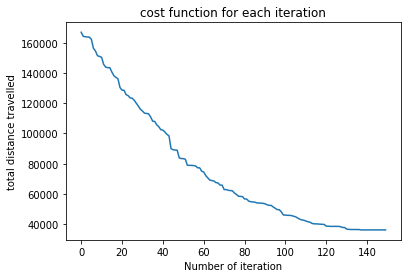


 
 
 for cooling rate=0.95 and for initial temprature 100
Best solution: ['18', '7', '36', '28', '6', '37', '19', '27', '17', '43', '30', '20', '47', '21', '13', '11', '23', '14', '25', '5', '48', '39', '32', '24', '45', '35', '4', '26', '10', '42', '2', '29', '41', '34', '3', '22', '16', '1', '8', '38', '9', '40', '15', '12', '33', '46', '31', '44']
Best distance: 35345.0


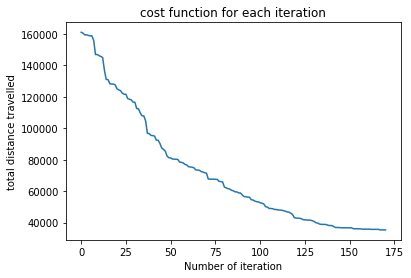


 
 
 for cooling rate=0.95 and for initial temprature 500
Best solution: ['15', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '22', '16', '41', '34', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '32', '39', '25', '21', '47', '20', '12', '11', '13', '14', '23', '3', '40']
Best distance: 34846.0


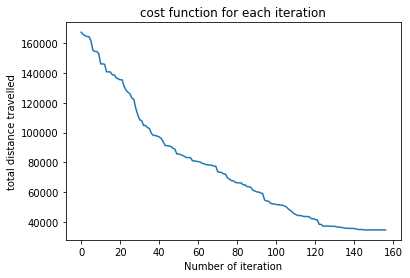


 
 
 for cooling rate=0.95 and for initial temprature 1000
Best solution: ['41', '29', '2', '26', '4', '35', '45', '10', '24', '32', '39', '48', '42', '5', '25', '13', '21', '47', '11', '12', '20', '30', '43', '17', '27', '19', '37', '6', '28', '36', '7', '18', '44', '46', '33', '15', '40', '31', '38', '9', '8', '1', '16', '22', '3', '23', '14', '34']
Best distance: 37080.0


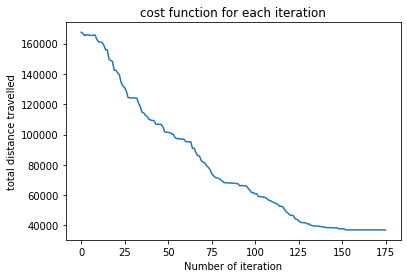


 
 
 for cooling rate=0.95 and for initial temprature 2000
Best solution: ['31', '38', '8', '16', '22', '1', '9', '40', '15', '12', '11', '23', '14', '3', '34', '41', '29', '2', '42', '26', '4', '35', '45', '10', '24', '5', '48', '39', '32', '21', '25', '13', '47', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44']
Best distance: 35705.0


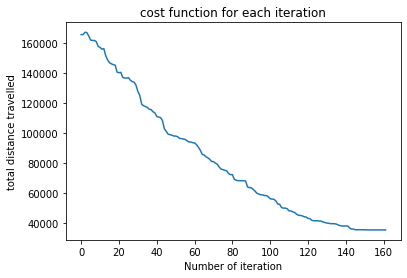


 
 
 for cooling rate=0.95 and for initial temprature 3000
Best solution: ['27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '40', '9', '8', '1', '16', '22', '3', '41', '29', '2', '42', '26', '4', '35', '45', '10', '24', '32', '39', '48', '5', '34', '14', '25', '23', '13', '21', '47', '11', '12', '15', '20', '33', '46', '36', '30', '43', '17']
Best distance: 35896.0


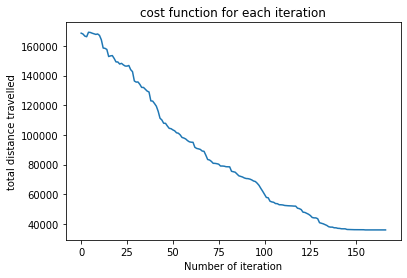


 
 
 for cooling rate=0.95 and for initial temprature 4000
Best solution: ['6', '28', '7', '18', '44', '31', '38', '8', '1', '9', '40', '22', '16', '3', '41', '34', '5', '29', '2', '26', '4', '35', '45', '10', '24', '42', '48', '32', '39', '25', '14', '23', '11', '13', '21', '47', '20', '12', '15', '33', '46', '36', '30', '43', '17', '27', '19', '37']
Best distance: 35103.0


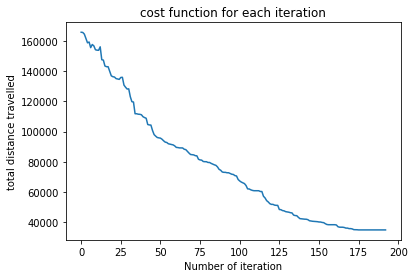


 
 
 for cooling rate=0.95 and for initial temprature 5000
Best solution: ['20', '12', '15', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '40', '22', '16', '41', '3', '23', '11', '13', '25', '14', '34', '5', '29', '2', '42', '10', '26', '4', '35', '45', '24', '48', '39', '32', '21', '47']
Best distance: 35500.0


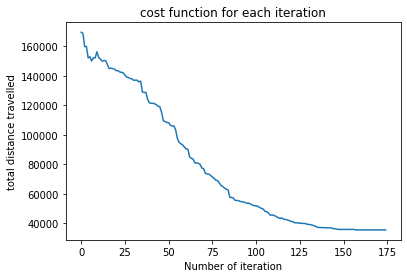


 
 
 for cooling rate=0.95 and for initial temprature 10000
Best solution: ['41', '16', '22', '1', '8', '9', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '15', '40', '12', '20', '47', '21', '39', '32', '24', '10', '45', '35', '4', '26', '42', '2', '29', '5', '48', '25', '14', '13', '11', '23', '3', '34']
Best distance: 34102.0


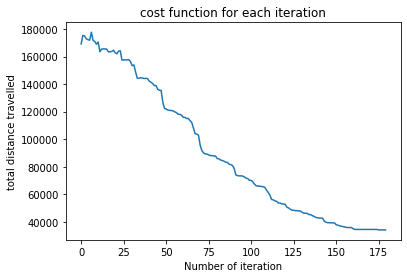


 
 
 for cooling rate=0.96 and for initial temprature 0.5
Best solution: ['40', '9', '38', '8', '1', '16', '22', '3', '23', '14', '34', '41', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '32', '39', '25', '13', '21', '47', '11', '12', '33', '20', '30', '43', '17', '27', '19', '37', '6', '28', '36', '7', '18', '44', '31', '46', '15']
Best distance: 35260.0


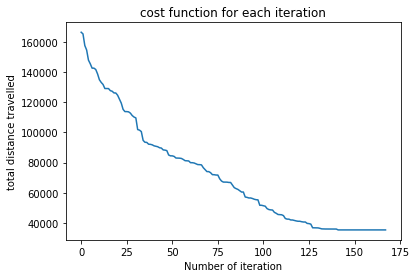


 
 
 for cooling rate=0.96 and for initial temprature 0.8
Best solution: ['43', '17', '27', '19', '37', '6', '30', '28', '36', '7', '18', '44', '31', '38', '46', '33', '12', '15', '9', '8', '1', '22', '16', '41', '34', '3', '40', '11', '23', '14', '25', '5', '29', '2', '26', '4', '35', '45', '10', '24', '42', '48', '39', '32', '21', '13', '47', '20']
Best distance: 36067.0


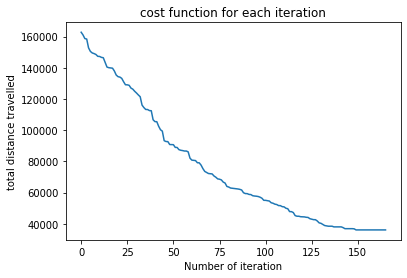


 
 
 for cooling rate=0.96 and for initial temprature 1
Best solution: ['46', '33', '15', '40', '12', '20', '47', '11', '13', '21', '32', '39', '25', '14', '23', '34', '5', '48', '42', '24', '10', '45', '35', '4', '26', '2', '29', '41', '3', '22', '16', '1', '8', '9', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36']
Best distance: 35613.0


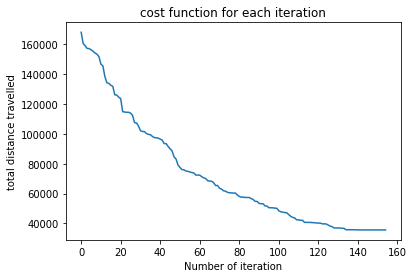


 
 
 for cooling rate=0.96 and for initial temprature 100
Best solution: ['19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '16', '22', '3', '34', '41', '2', '29', '5', '48', '42', '26', '4', '35', '45', '10', '24', '32', '39', '25', '14', '23', '11', '13', '21', '47', '20', '33', '12', '40', '15', '46', '36', '30', '43', '17', '27']
Best distance: 34611.0


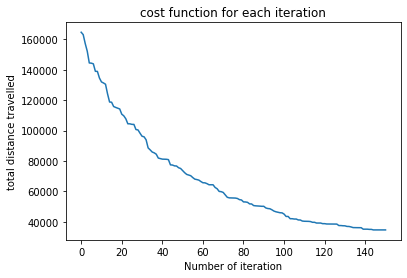


 
 
 for cooling rate=0.96 and for initial temprature 500
Best solution: ['27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '40', '11', '23', '25', '14', '34', '3', '22', '16', '41', '29', '2', '26', '4', '35', '45', '10', '24', '42', '5', '48', '39', '32', '21', '13', '47', '20', '12', '15', '33', '46', '36', '30', '43', '17']
Best distance: 34434.0


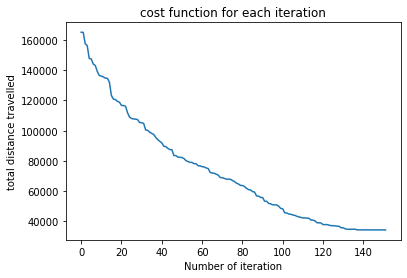


 
 
 for cooling rate=0.96 and for initial temprature 1000
Best solution: ['4', '26', '2', '41', '34', '14', '3', '22', '16', '1', '8', '9', '40', '15', '12', '33', '46', '38', '31', '44', '18', '7', '36', '28', '6', '37', '19', '27', '17', '43', '30', '20', '47', '11', '23', '13', '25', '21', '32', '39', '48', '5', '29', '42', '24', '10', '45', '35']
Best distance: 36207.0


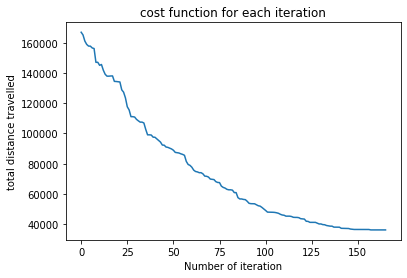


 
 
 for cooling rate=0.96 and for initial temprature 2000
Best solution: ['45', '10', '42', '5', '48', '24', '32', '39', '21', '13', '25', '14', '23', '11', '47', '20', '43', '17', '27', '19', '37', '6', '30', '28', '36', '7', '18', '44', '33', '12', '15', '46', '31', '38', '9', '8', '1', '40', '22', '16', '3', '34', '41', '29', '2', '26', '4', '35']
Best distance: 36569.0


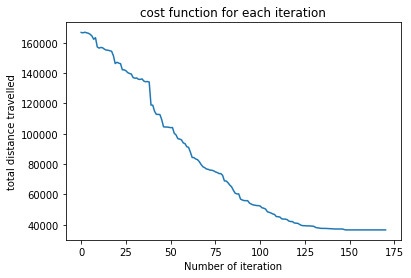


 
 
 for cooling rate=0.96 and for initial temprature 3000
Best solution: ['27', '17', '43', '30', '36', '46', '15', '33', '20', '12', '11', '23', '13', '47', '21', '25', '14', '5', '48', '39', '32', '24', '42', '10', '45', '35', '4', '26', '2', '29', '34', '41', '16', '22', '3', '40', '9', '1', '8', '38', '31', '44', '18', '7', '28', '6', '37', '19']
Best distance: 35323.0


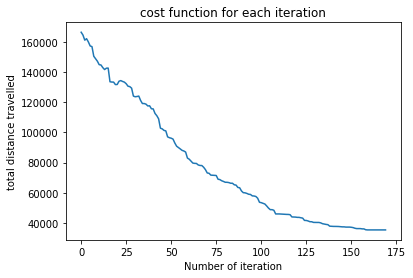


 
 
 for cooling rate=0.96 and for initial temprature 4000
Best solution: ['36', '46', '33', '20', '12', '15', '40', '11', '47', '21', '13', '25', '39', '32', '48', '5', '29', '42', '24', '10', '45', '35', '4', '26', '2', '41', '34', '14', '23', '3', '22', '16', '1', '8', '9', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30']
Best distance: 35263.0


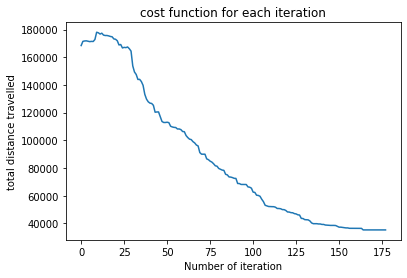


 
 
 for cooling rate=0.96 and for initial temprature 5000
Best solution: ['25', '39', '32', '21', '47', '23', '11', '12', '15', '20', '33', '46', '36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '40', '3', '22', '16', '41', '34', '29', '2', '26', '4', '35', '45', '10', '24', '42', '48', '5', '14', '13']
Best distance: 35417.0


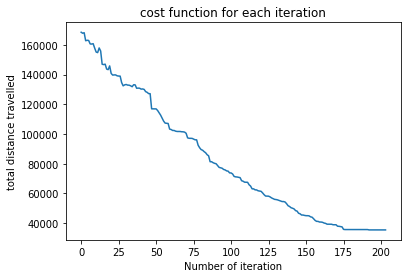


 
 
 for cooling rate=0.96 and for initial temprature 10000
Best solution: ['36', '30', '43', '17', '27', '19', '37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '16', '22', '3', '23', '11', '13', '25', '14', '34', '41', '29', '2', '42', '26', '4', '35', '45', '10', '24', '5', '48', '39', '32', '21', '47', '20', '33', '12', '40', '15', '46']
Best distance: 34653.0


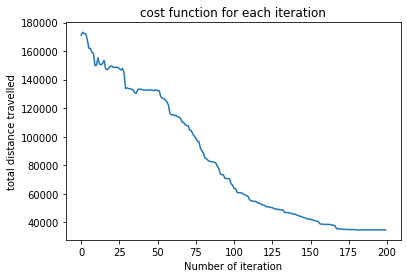


 
 
 for cooling rate=0.97 and for initial temprature 0.5
Best solution: ['37', '6', '28', '7', '18', '44', '31', '38', '9', '8', '1', '16', '22', '3', '41', '34', '14', '25', '48', '5', '29', '2', '26', '4', '35', '45', '10', '42', '24', '32', '39', '21', '13', '47', '20', '33', '12', '11', '23', '40', '15', '46', '36', '30', '43', '17', '27', '19']
Best distance: 34794.0


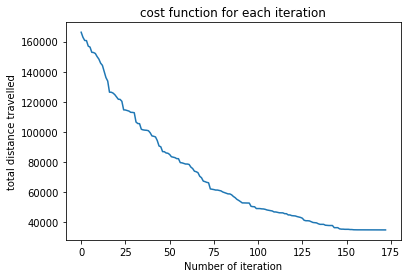


 
 
 for cooling rate=0.97 and for initial temprature 0.8


In [ ]:
for i in [0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
  for j in [0.5,0.8,1,100,500,1000,2000,3000,4000,5000,10000]:
    print(f"\n \n \n for cooling rate={i} and for initial temprature {j}")
    best_solution, best_distance,cost_list = simulated_annealing(distances, initial_solution,j,i,10000)
    print("Best solution:", best_solution)
    print("Best distance:", best_distance)
    plt.plot(cost_list)
    plt.xlabel("Number of iteration")
    plt.ylabel('total distance travelled')
    plt.title('cost function for each iteration')
    plt.show()

In [ ]:
for i in [0.80]:
  for j in [0.5,1,1.5]:
    print(f"\n \n \n for cooling rate={i} and for initial temprature {j}")
    best_solution, best_distance,cost_list = simulated_annealing(distances, initial_solution,j,i,10000)
    print("Best solution:", best_solution)
    print("Best distance:", best_distance)
    plt.plot(cost_list)
    plt.xlabel("Number of iteration")
    plt.ylabel('total distance travelled')
    plt.title('cost function for each iteration')
    plt.show()

$\huge{Que 3.9}$

i have taken cooling schedule as 
$T_{k+1}=\frac{T}{1+\alpha*T_{k}}$

In [ ]:
# Define the function that computes the total distance of a solution
def compute_distance(distances, solution):
    distance = 0
    for i in range(len(solution) - 1):
        distance += distances[cities.index(solution[i])][cities.index(solution[i+1])]
    distance += distances[cities.index(solution[-1])][cities.index(solution[0])]
    return distance

# Define the simulated annealing algorithm
def simulated_annealing(distances, initial_solution, initial_temperature, cooling_rate,max_iteration):
    current_solution = initial_solution
    best_solution = initial_solution
    current_distance = compute_distance(distances, initial_solution)
    best_distance = current_distance
    temperature = initial_temperature
    cost_list=[]
    k=0
    while temperature > 0:
        # Make a small random change to the current solution
        new_solution = current_solution.copy()
        i, j = sorted(random.sample(range(len(cities)), 2))
        new_solution[i:j+1] = reversed(new_solution[i:j+1])
        new_distance = compute_distance(distances, new_solution)
        # Decide whether to accept the new solution
        delta_distance = new_distance - current_distance
        if delta_distance < 0 or math.exp(-delta_distance / temperature) > random.random():
            current_solution = new_solution
            current_distance = new_distance
            cost_list.append(new_distance)
        # Update the best solution if necessary
        if current_distance < best_distance:
            best_solution = current_solution
            best_distance = current_distance
        # Decrease the temperature
        temperature =temperature/(1+temperature*cooling_rate)
        k+=1
        if k>=max_iteration:
          return  best_solution, best_distance,cost_list
    return best_solution, best_distance,cost_list


In [ ]:
distances =df1

# Define the initial solution
cities = [str(i) for i in range(1,12)]
initial_solution = random.sample(cities, len(cities))

In [ ]:
for i in [0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
  for j in [0.5,0.8,1,100,500,1000,2000,3000,4000,5000,10000]:
    print(f"\n \n \n for cooling rate={i} and for initial temprature {j}")
    best_solution, best_distance,cost_list = simulated_annealing(distances, initial_solution,j,i,10000)
    print("Best solution:", best_solution)
    print("Best distance:", best_distance)
    plt.plot(cost_list)
    plt.xlabel("Number of iteration")
    plt.ylabel('total distance travelled')
    plt.title('cost function for each iteration')
    plt.show()

here by increasing T_1 number of iteration increse and by increasing alpha number of iteration decrease 

In [ ]:
for i in [0.80]:
  for j in [0.5,1,1.5]:
    print(f"\n \n \n for cooling rate={i} and for initial temprature {j}")
    best_solution, best_distance,cost_list = simulated_annealing(distances, initial_solution,j,i,10000)
    print("Best solution:", best_solution)
    print("Best distance:", best_distance)
    plt.plot(cost_list)
    plt.xlabel("Number of iteration")
    plt.ylabel('total distance travelled')
    plt.title('cost function for each iteration')
    plt.show()

In [ ]:
distances =df2

# Define the initial solution
cities = [str(i) for i in range(1,49)]
initial_solution = random.sample(cities, len(cities))

In [ ]:
for i in [0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
  for j in [0.5,0.8,1,100,500,1000,2000,3000,4000,5000,10000]:
    print(f"\n \n \n for cooling rate={i} and for initial temprature {j}")
    best_solution, best_distance,cost_list = simulated_annealing(distances, initial_solution,j,i,10000)
    print("Best solution:", best_solution)
    print("Best distance:", best_distance)
    plt.plot(cost_list)
    plt.xlabel("Number of iteration")
    plt.ylabel('total distance travelled')
    plt.title('cost function for each iteration')
    plt.show()

In [ ]:
for i in [0.80]:
  for j in [0.5,1,1.5]:
    print(f"\n \n \n for cooling rate={i} and for initial temprature {j}")
    best_solution, best_distance,cost_list = simulated_annealing(distances, initial_solution,j,i,10000)
    print("Best solution:", best_solution)
    print("Best distance:", best_distance)
    plt.plot(cost_list)
    plt.xlabel("Number of iteration")
    plt.ylabel('total distance travelled')
    plt.title('cost function for each iteration')
    plt.show()